predicted amount for dept Animal Husbandary And Veterinary is  22579951.69452072
predicted amount for dept Agriculture and Farmers' Welfare is  23486067.105272014
predicted amount for dept Arts And Culture is  430080.0
predicted amount for dept Border Areas Development is  1474857.385099566
predicted amount for dept Co-Operation is  17926726.629886746
predicted amount for dept Community And Rural Development is  470823.6853300906
predicted amount for dept Education And Human Resources is  19428944.5
predicted amount for dept Excise, Registration, Taxation And Stamps is  20933598545.877647
predicted amount for dept Finance (Establishment) is  6218120.187580712
predicted amount for dept Fisheries is  1662057.433680768
predicted amount for dept Food Civil Supplies And Consumers Affairs is  184707911.7211588
predicted amount for dept Forest and Environment is  28410949942.665962
predicted amount for dept GAD(A) is  154262.06676547485
predicted amount for dept Health And Family Welfare is  

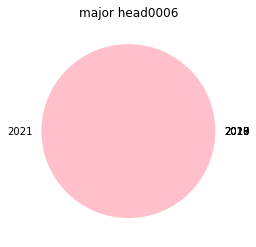

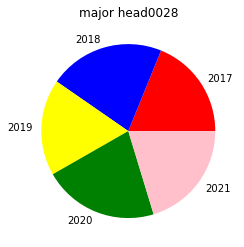

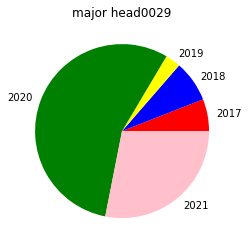

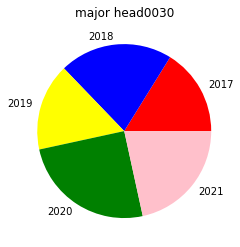

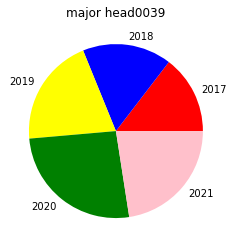

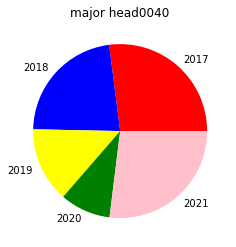

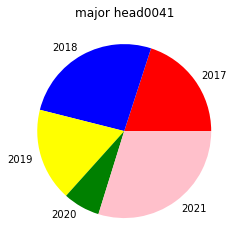

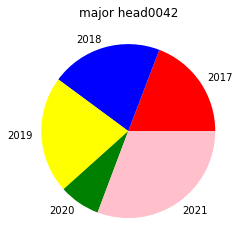

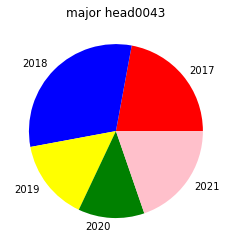

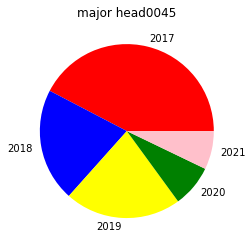

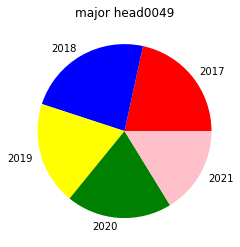

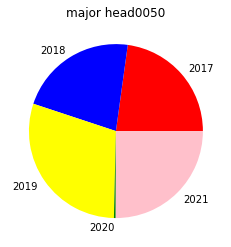

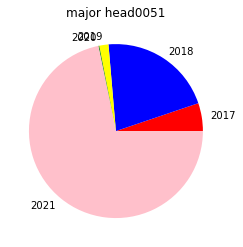

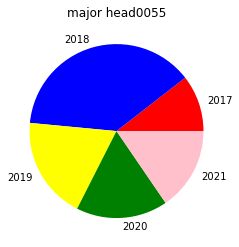

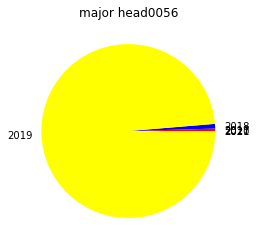

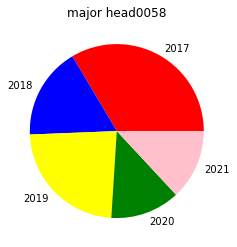

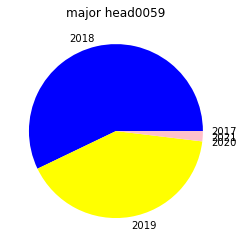

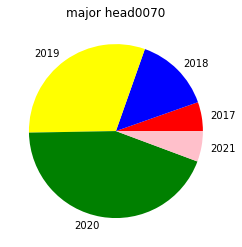

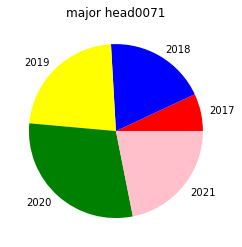

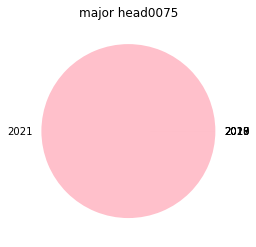

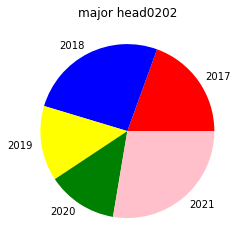

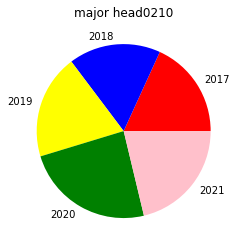

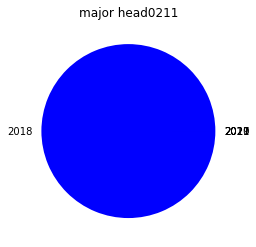

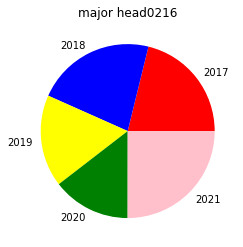

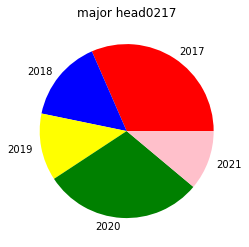

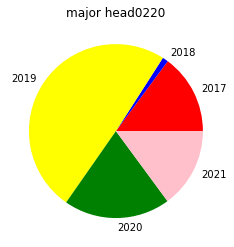

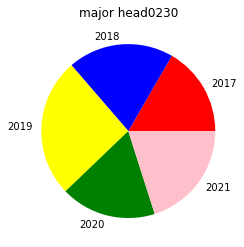

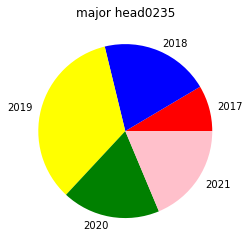

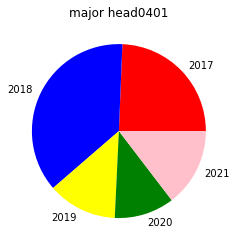

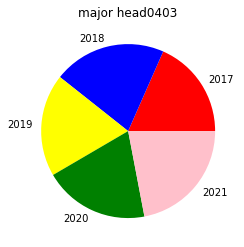

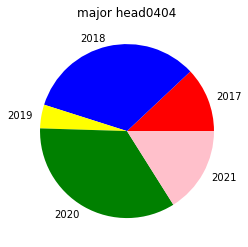

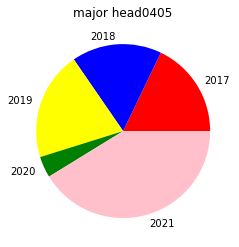

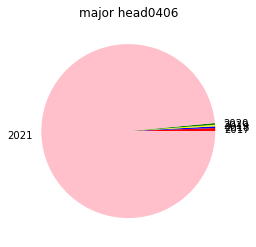

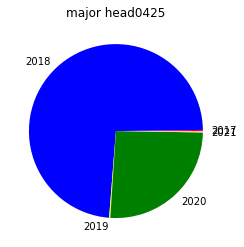

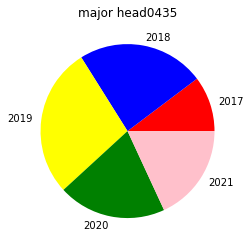

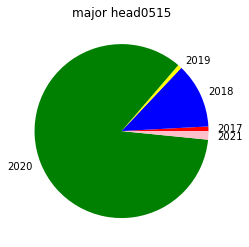

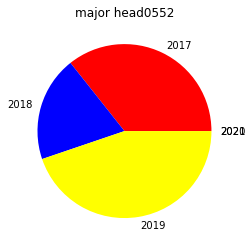

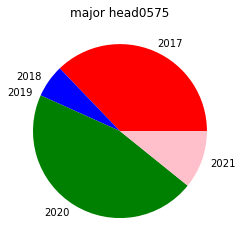

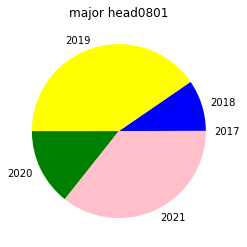

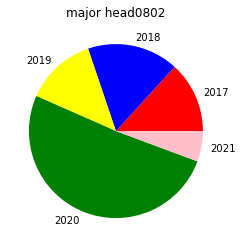

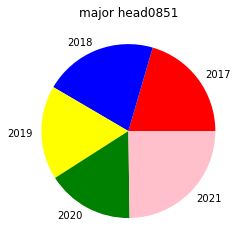

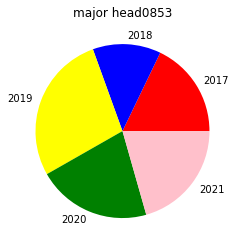

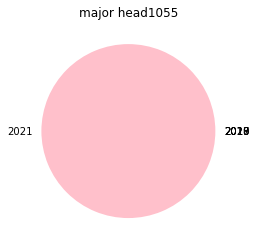

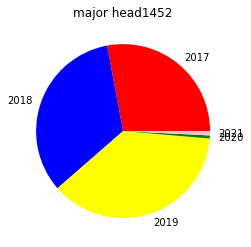

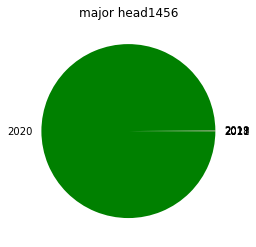

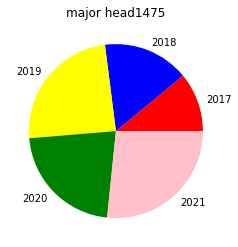

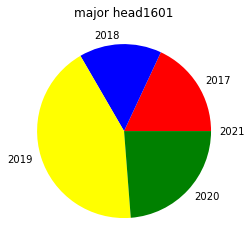

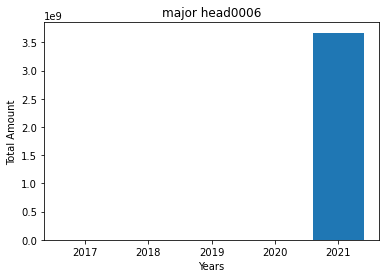

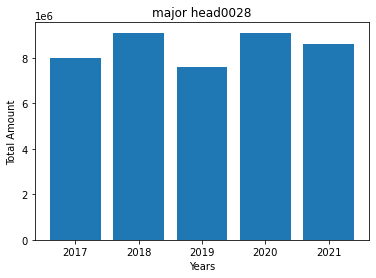

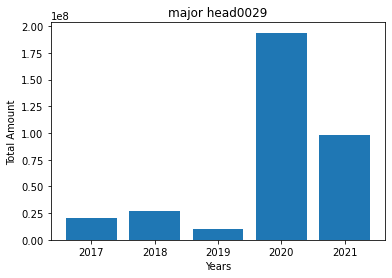

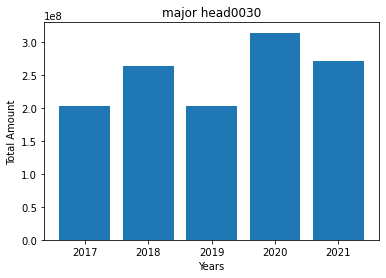

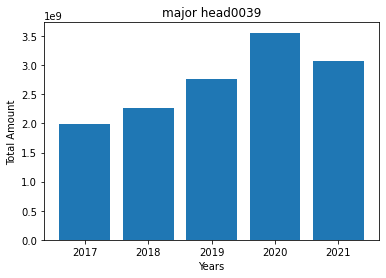

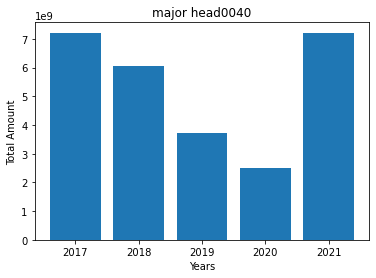

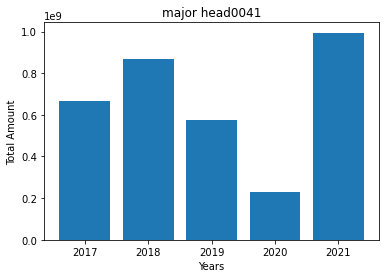

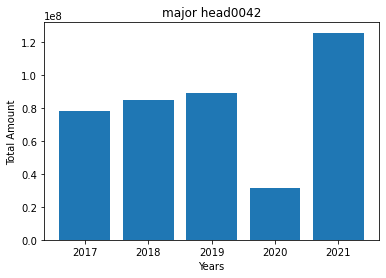

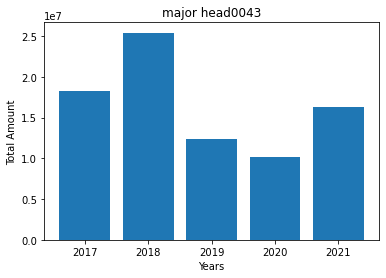

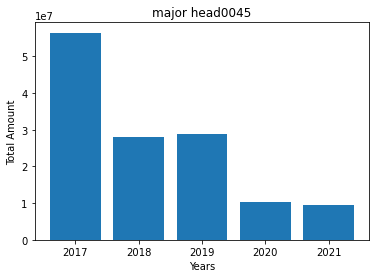

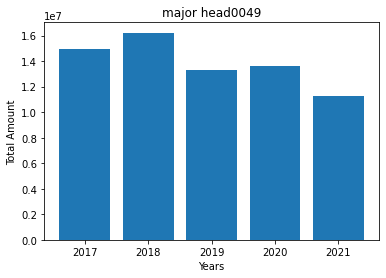

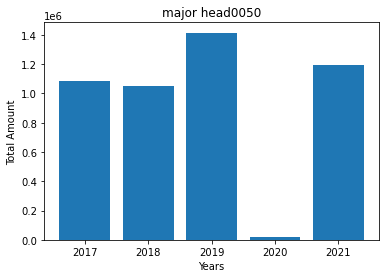

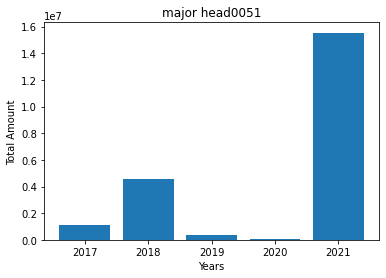

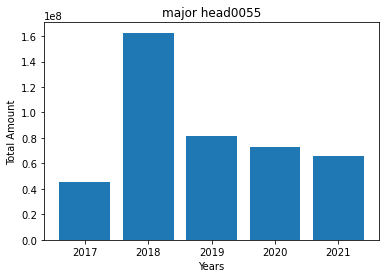

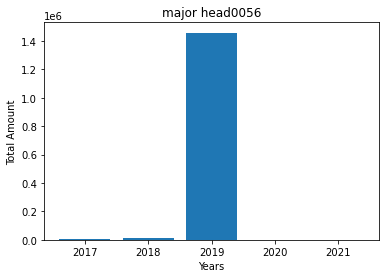

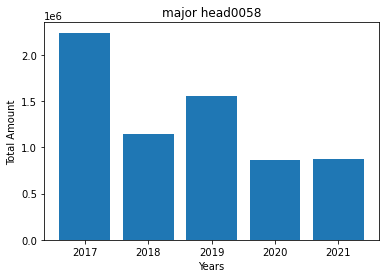

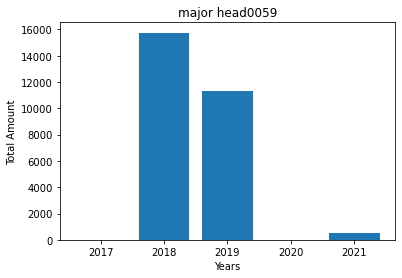

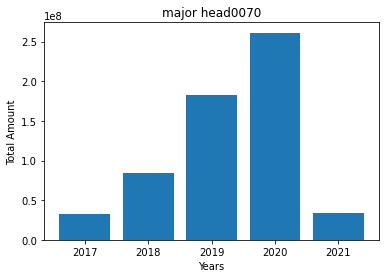

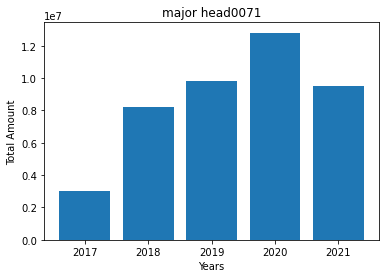

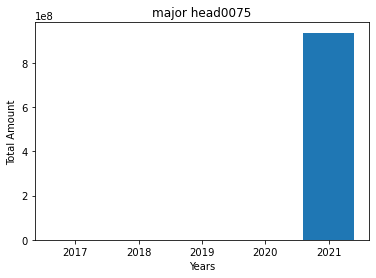

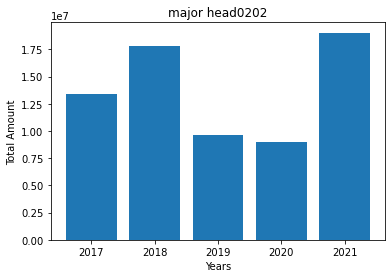

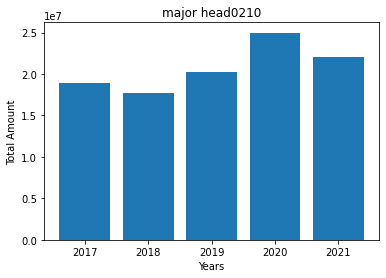

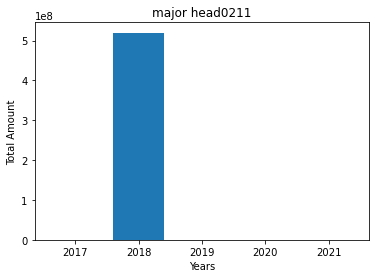

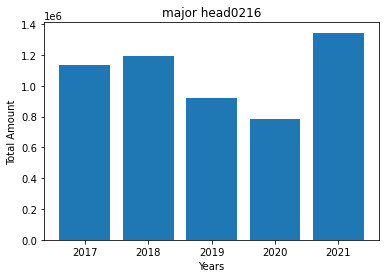

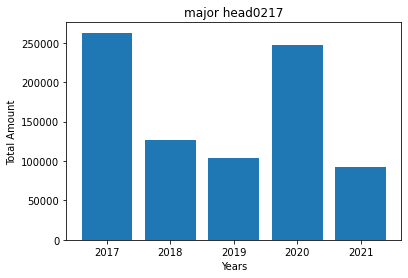

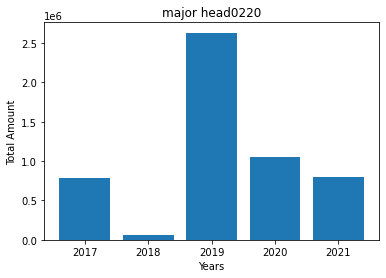

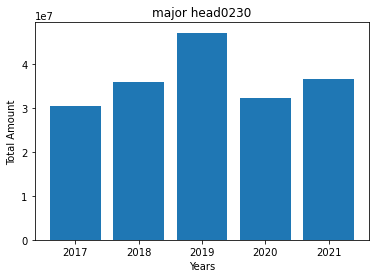

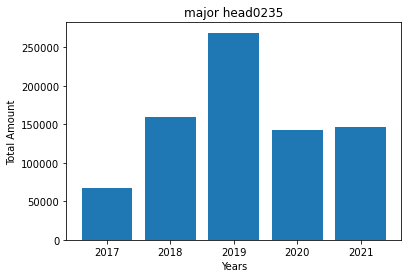

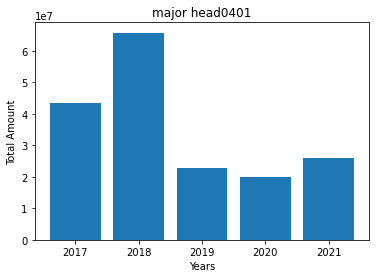

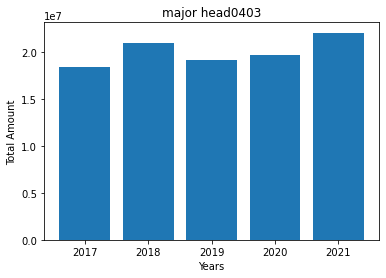

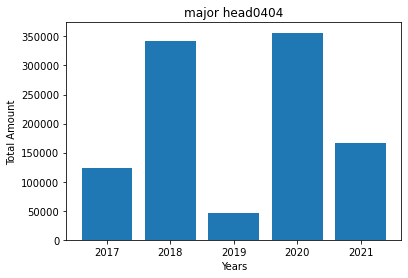

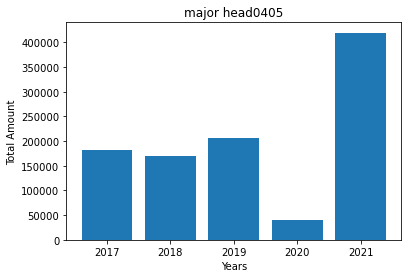

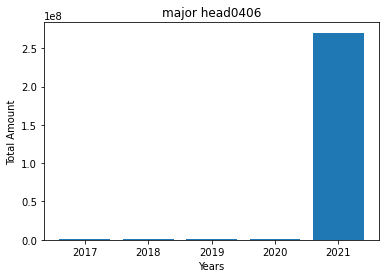

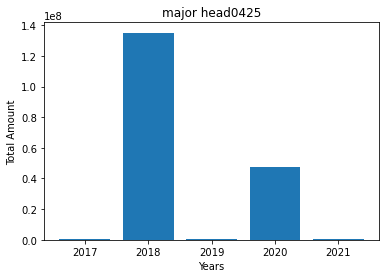

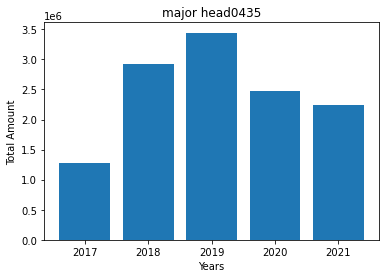

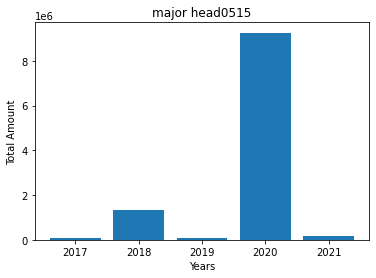

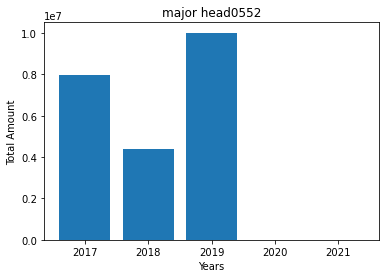

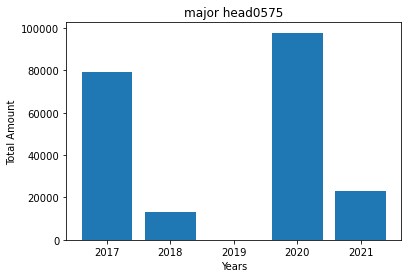

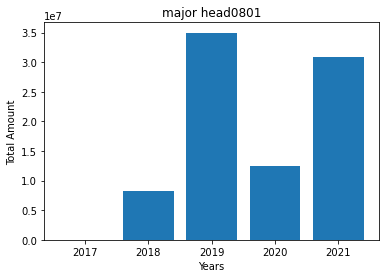

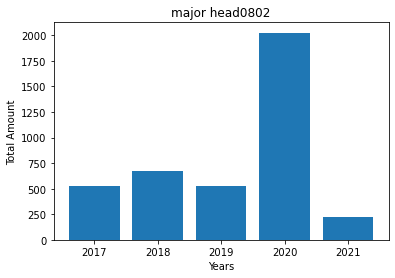

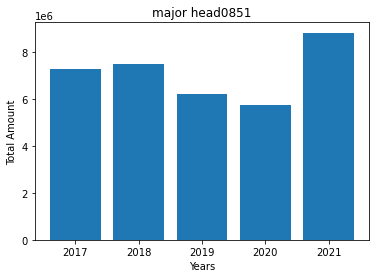

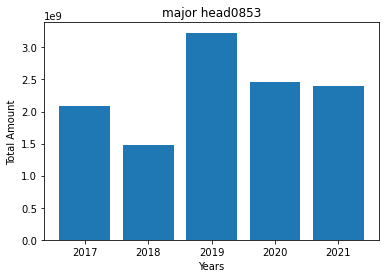

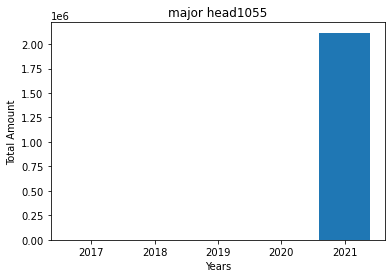

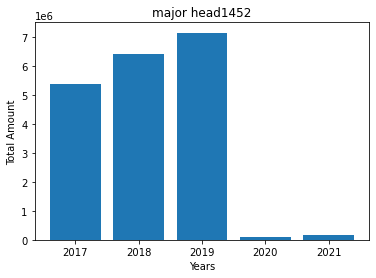

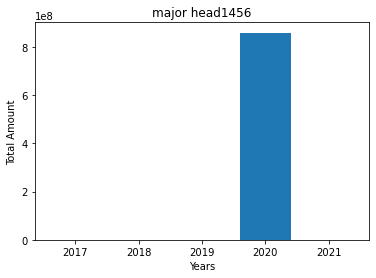

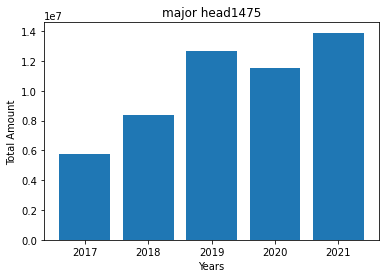

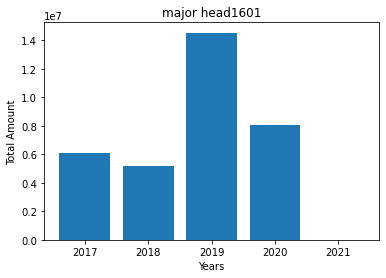

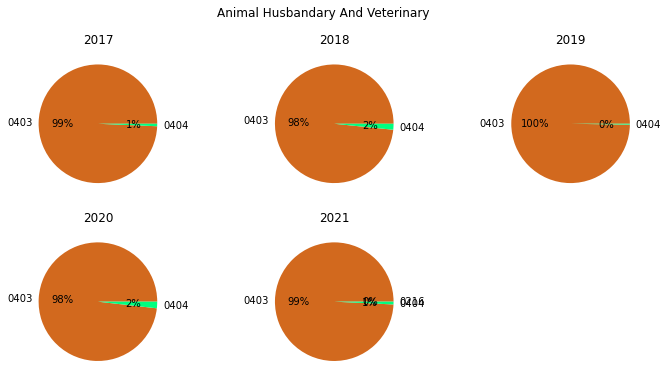

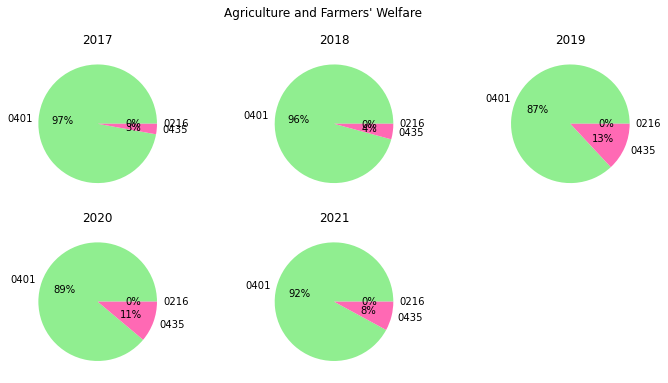

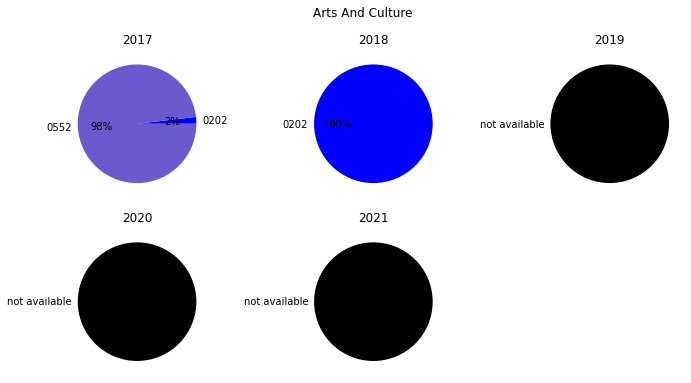

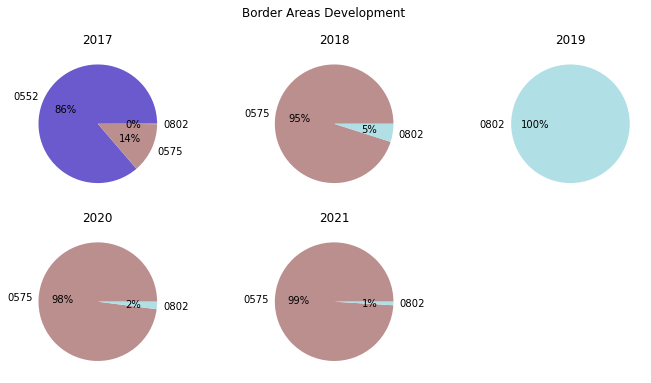

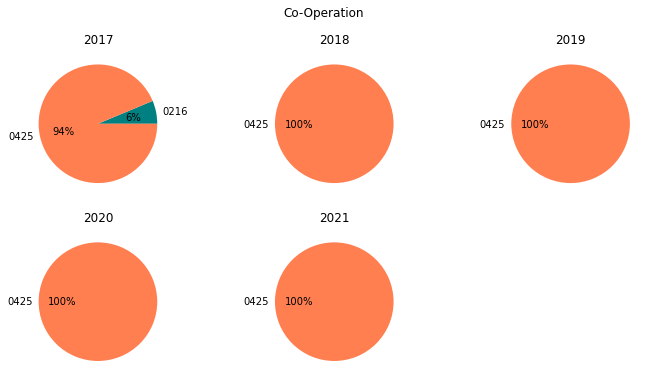

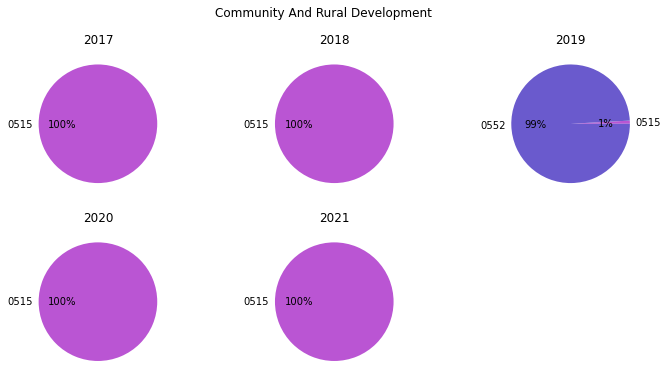

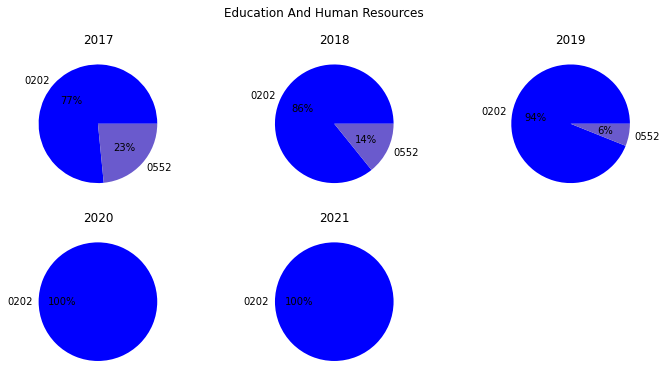

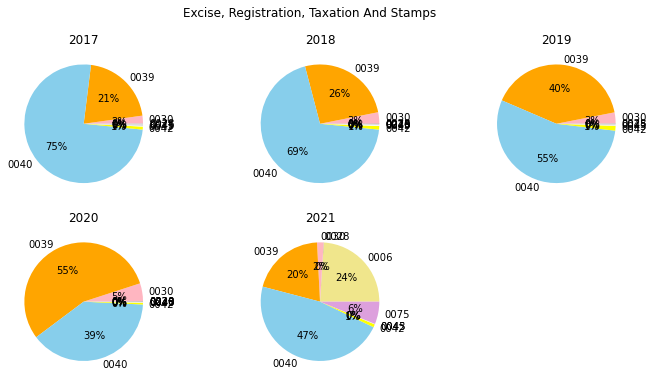

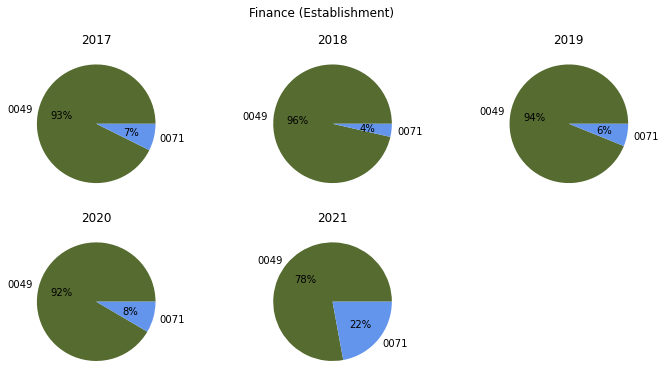

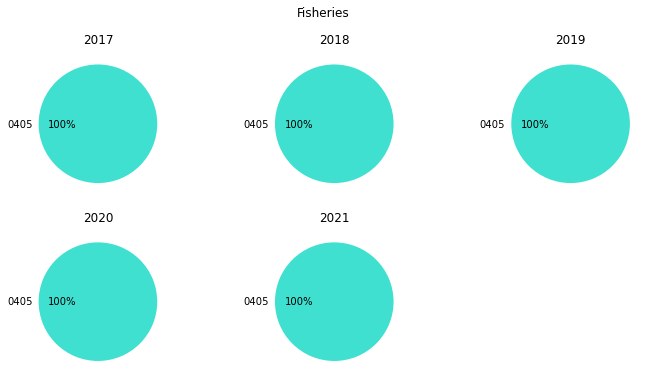

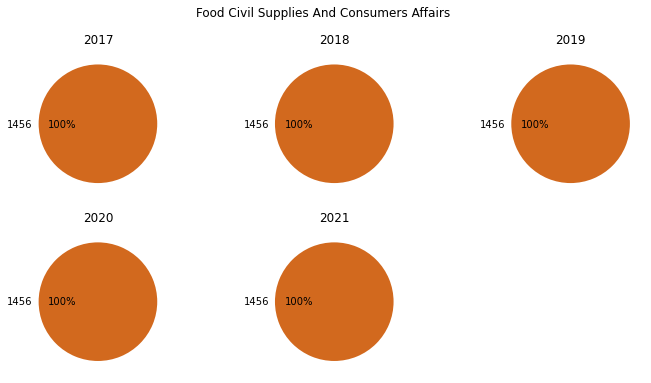

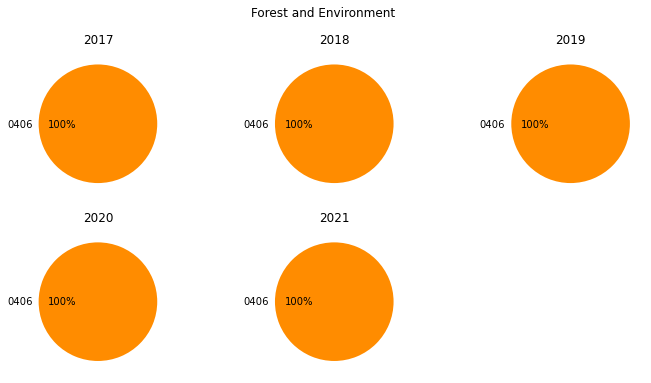

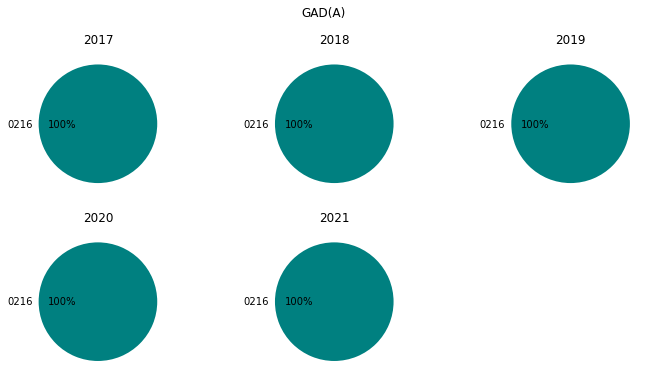

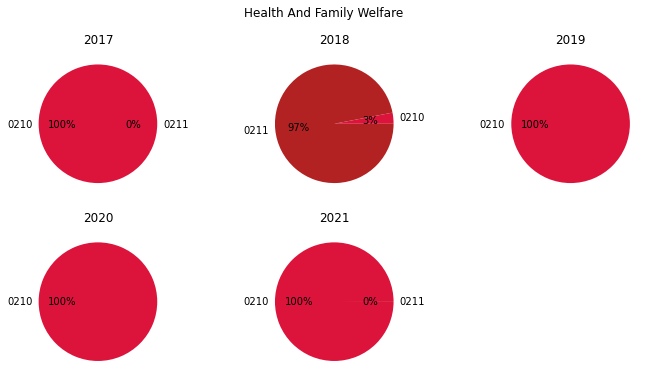

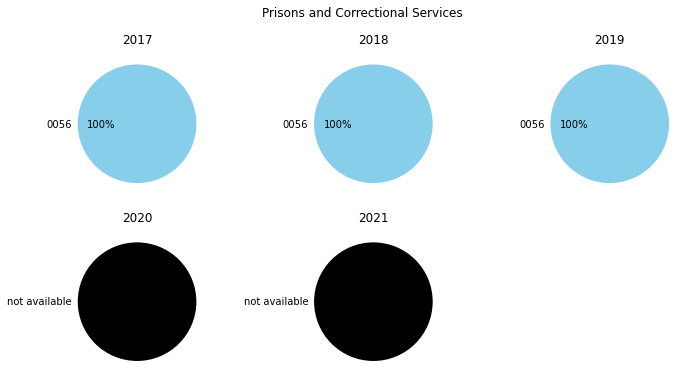

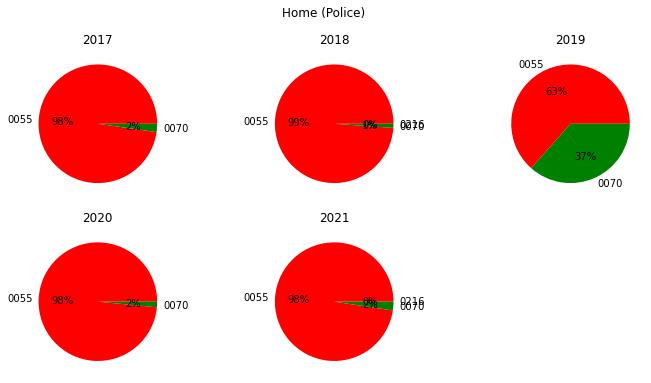

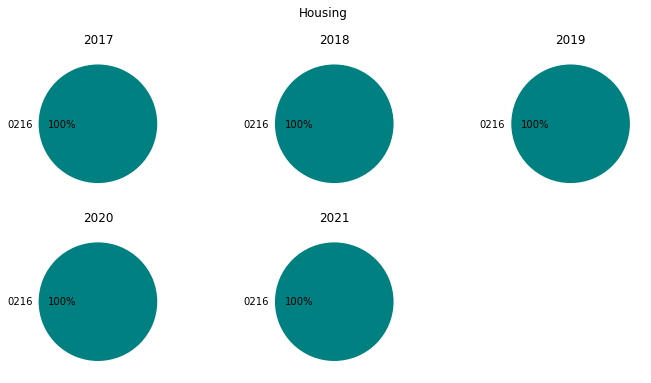

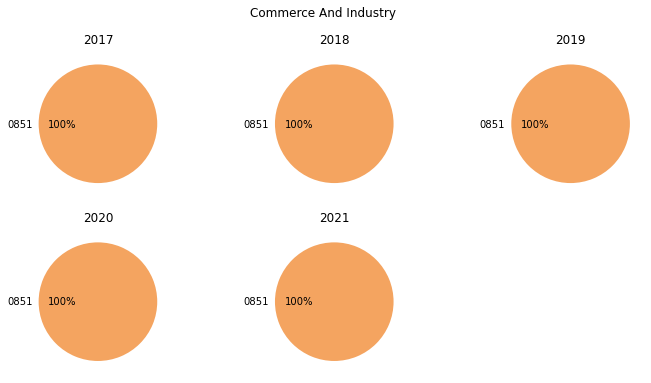

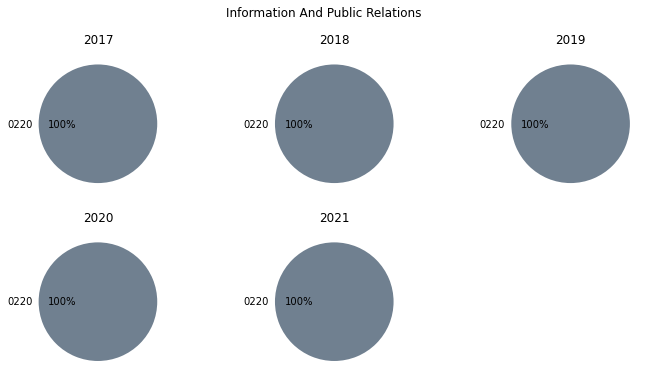

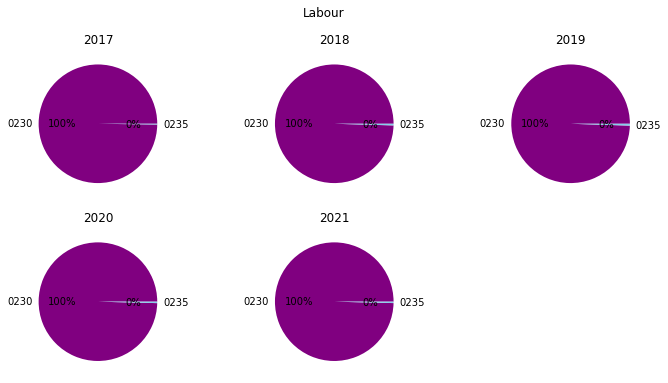

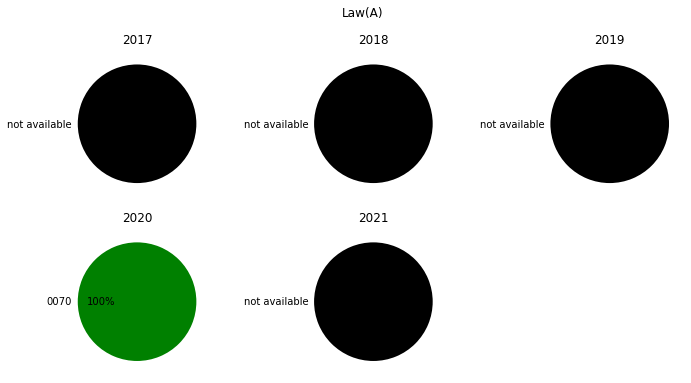

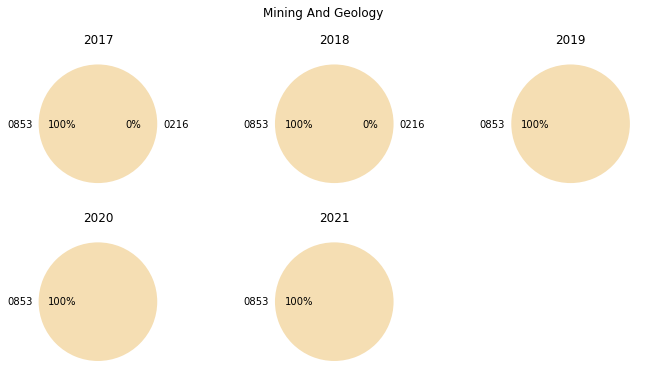

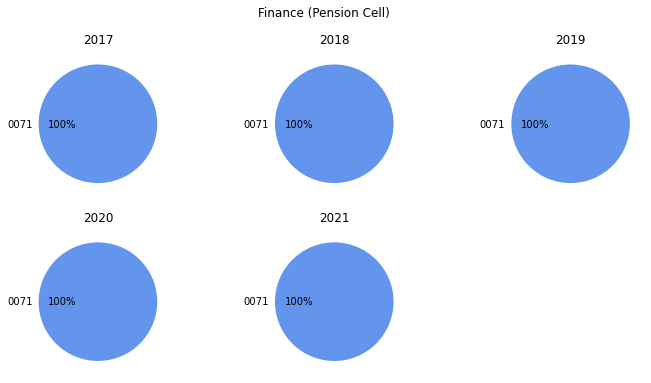

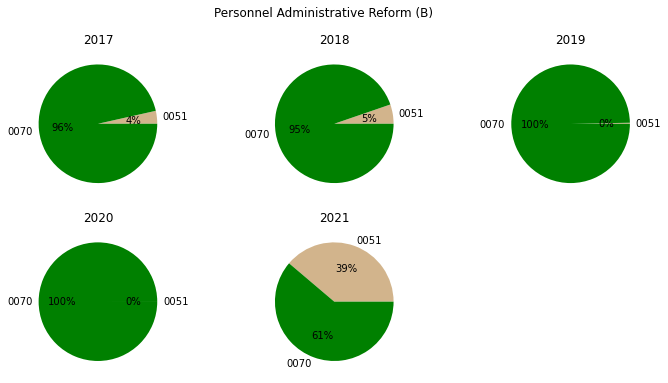

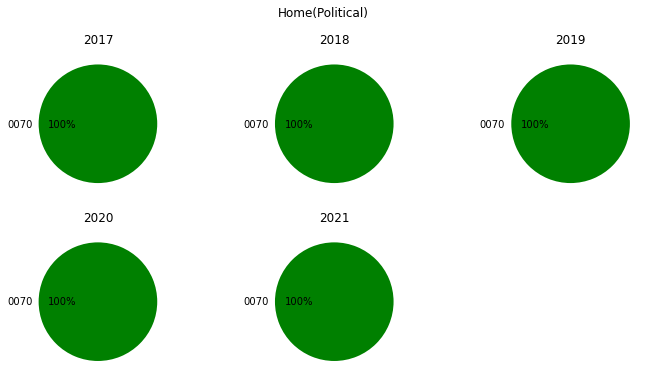

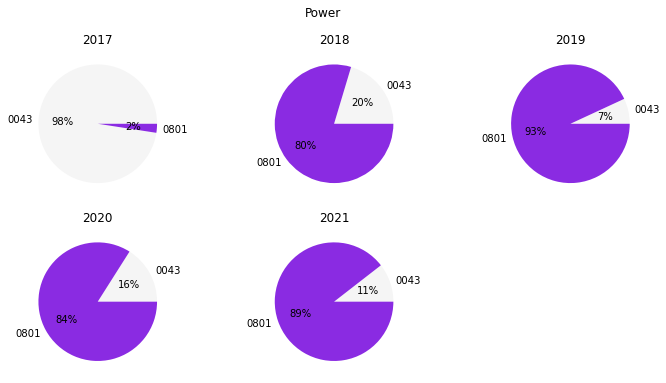

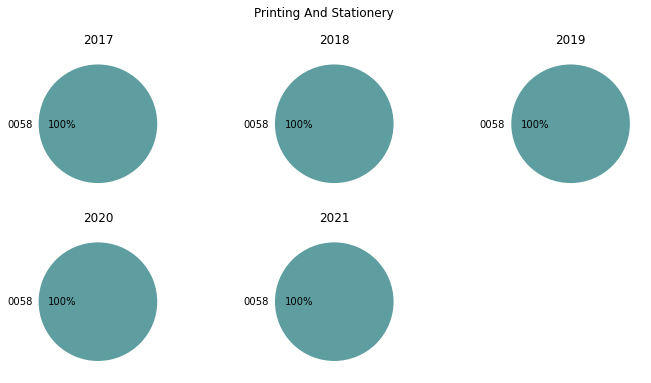

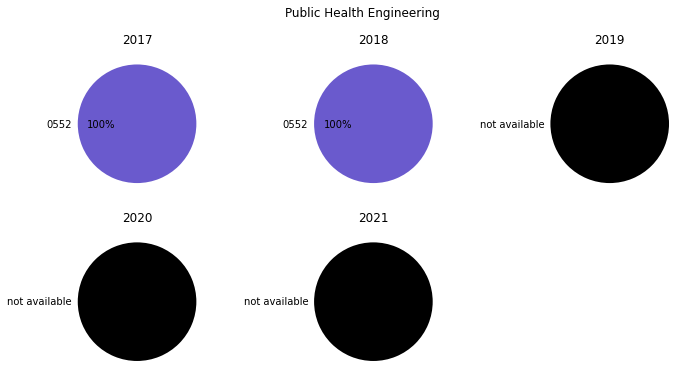

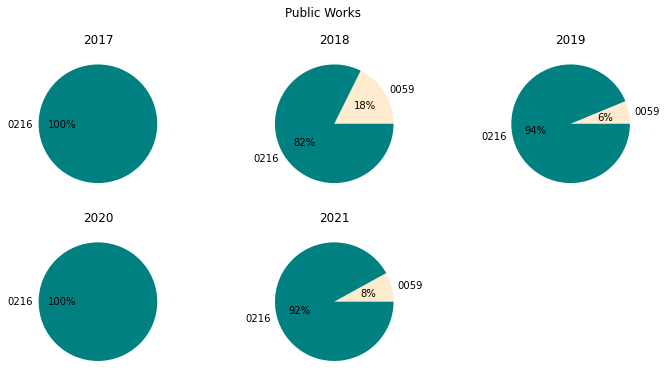

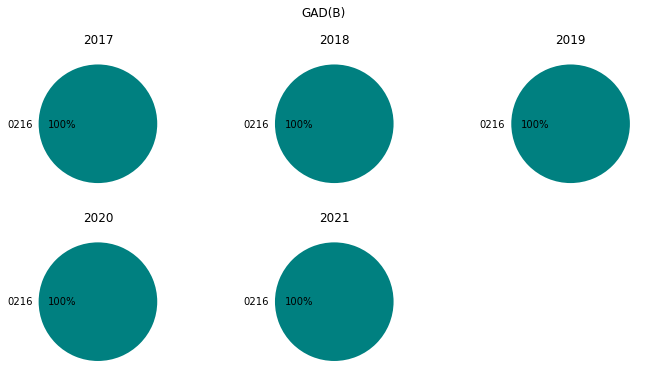

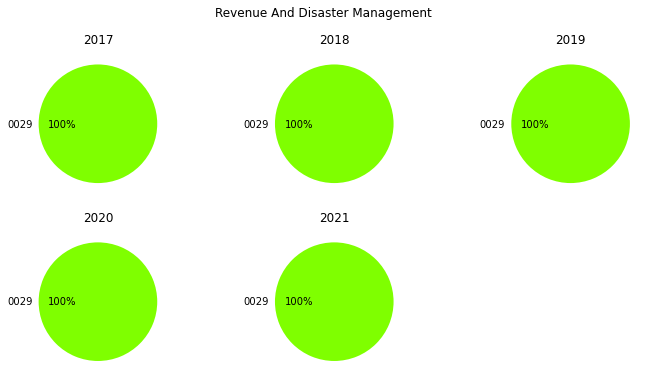

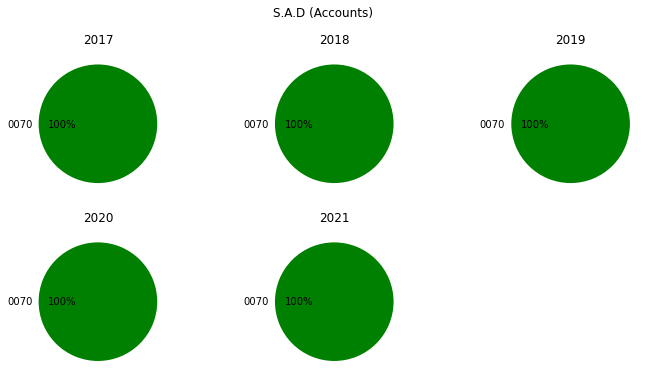

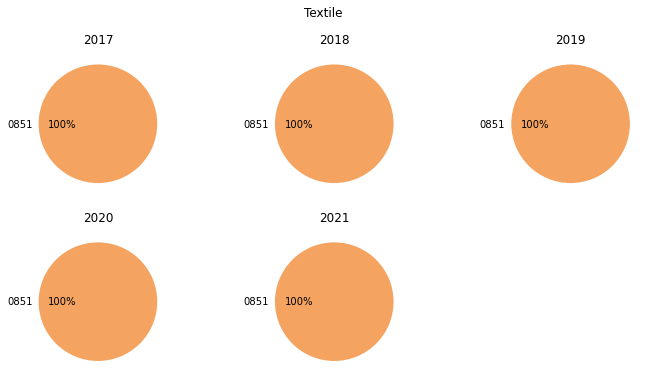

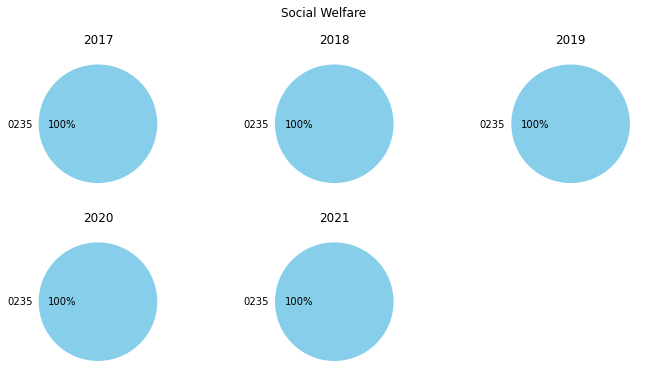

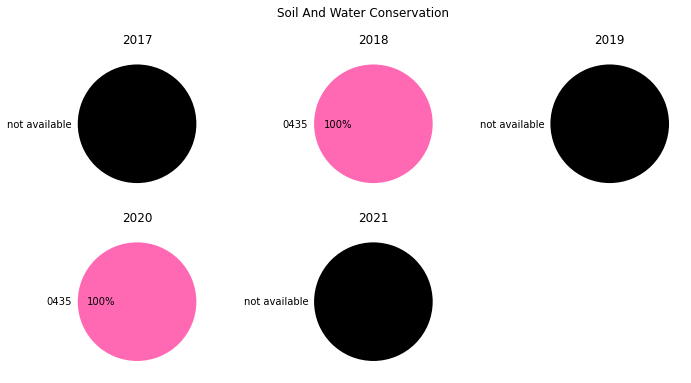

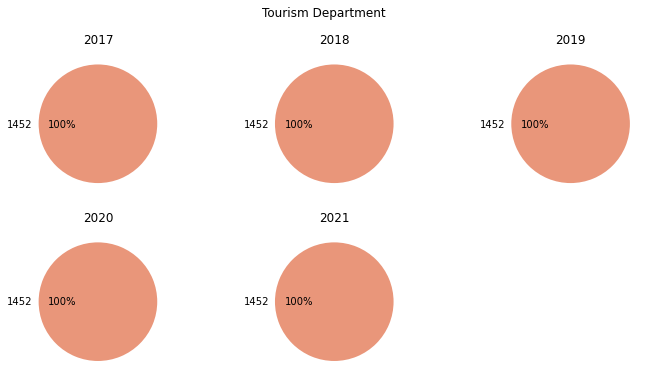

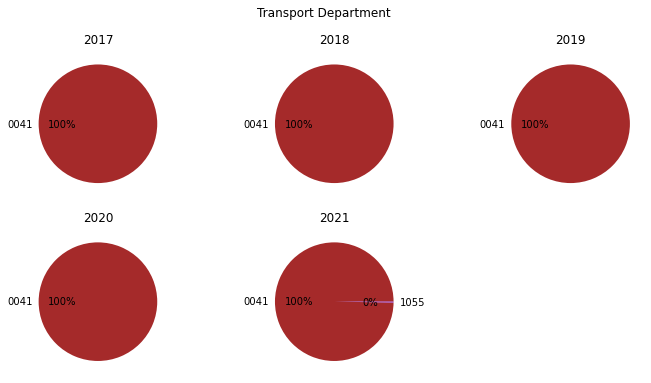

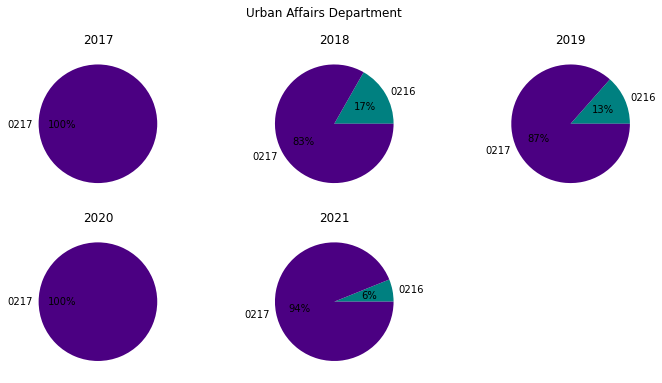

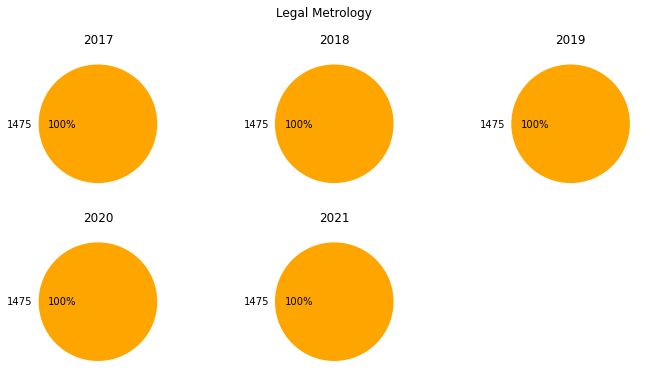

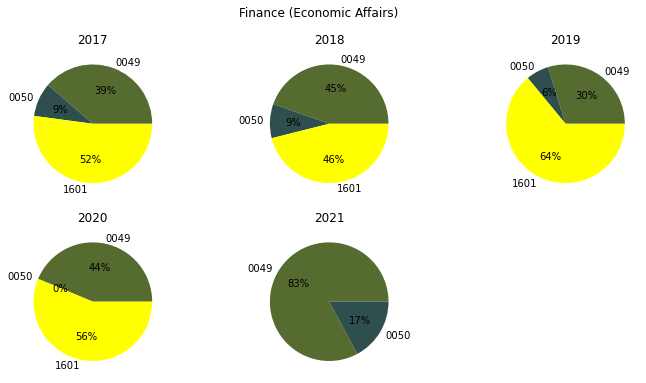

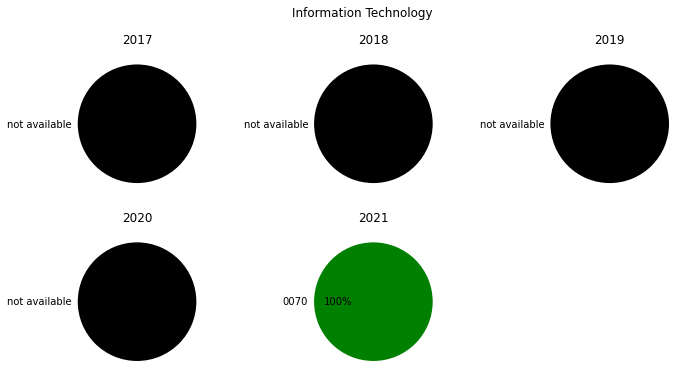

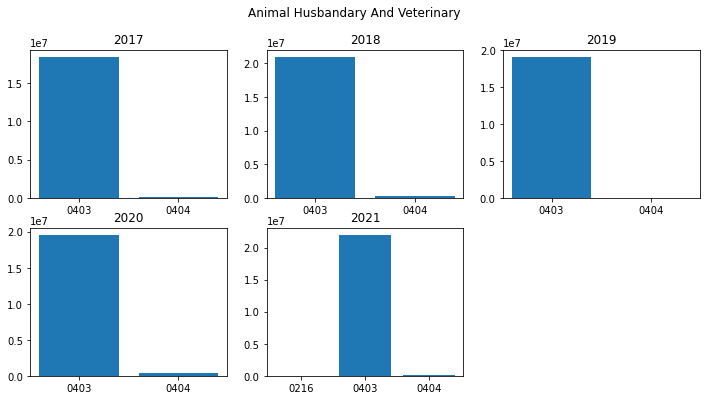

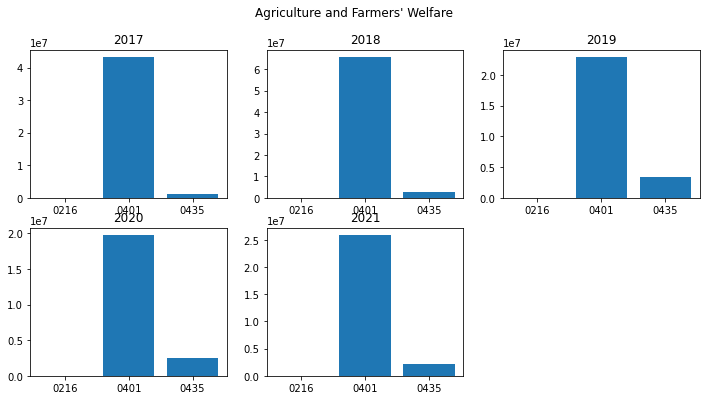

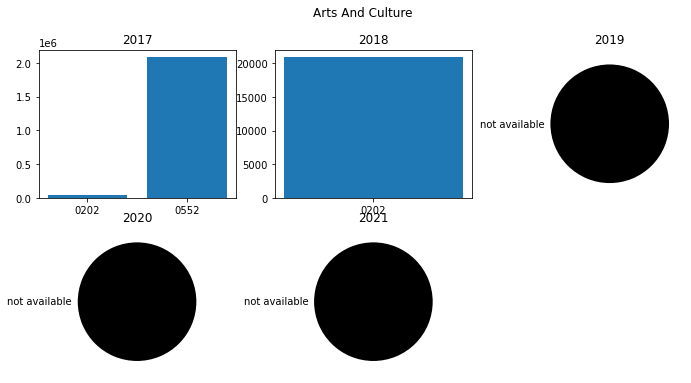

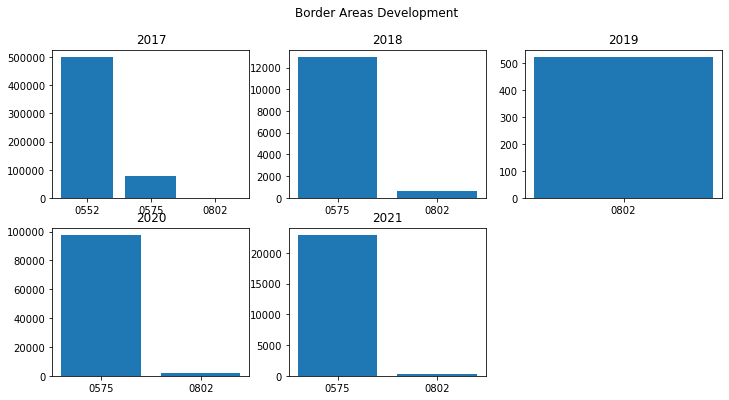

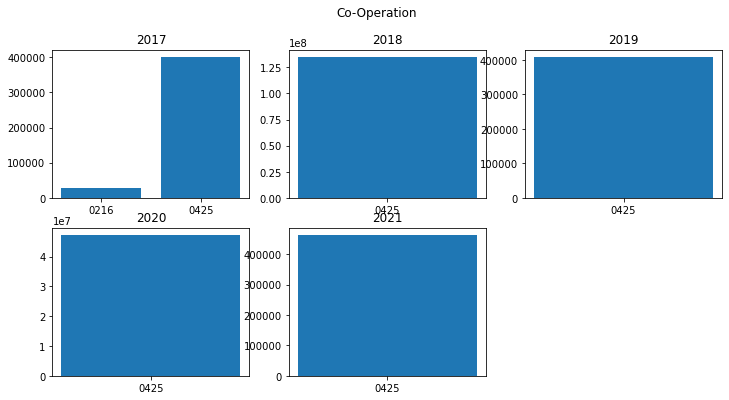

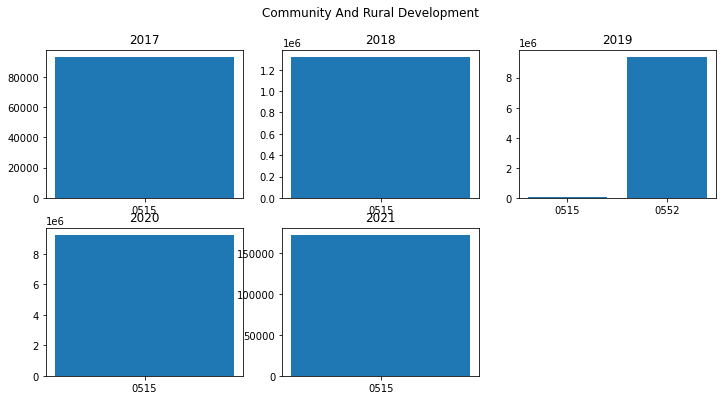

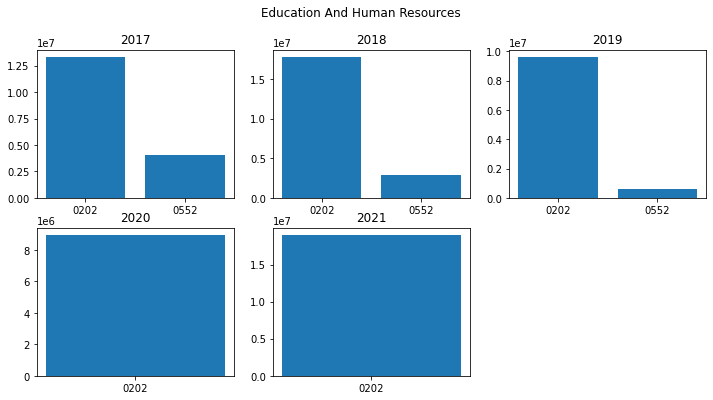

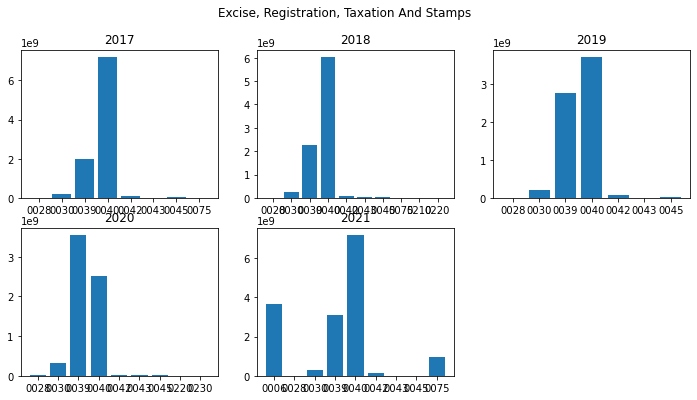

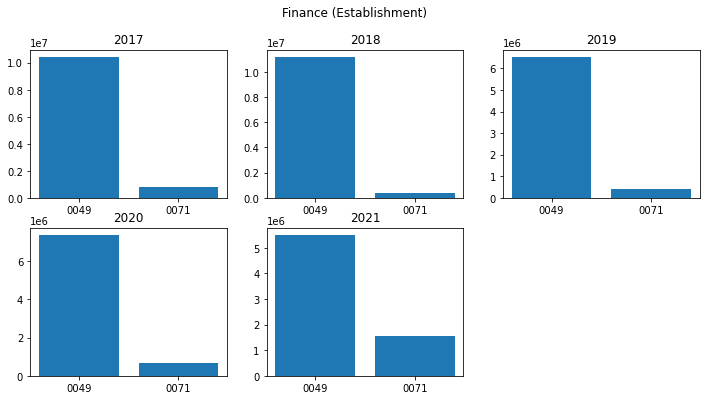

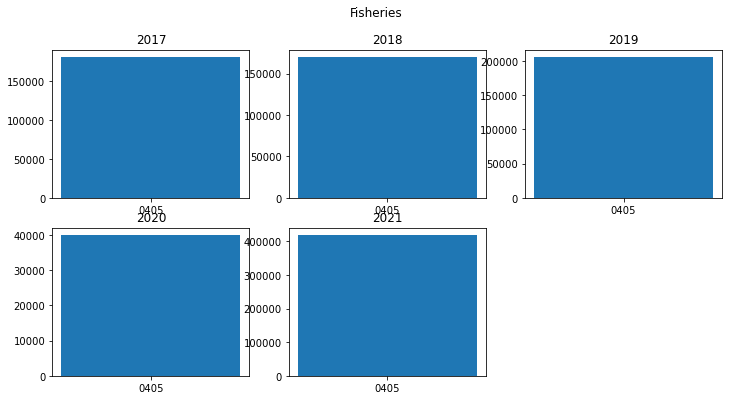

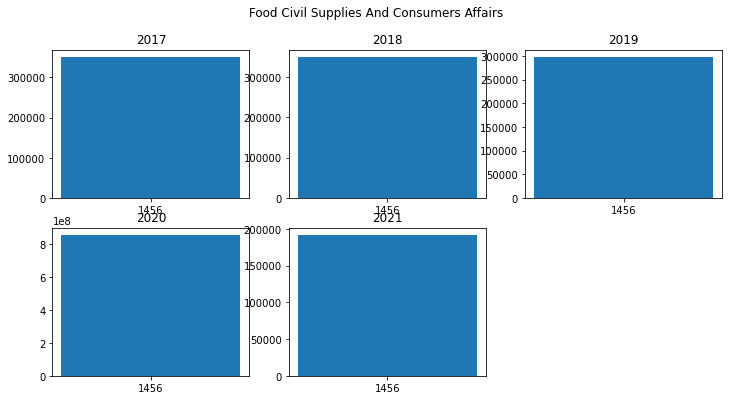

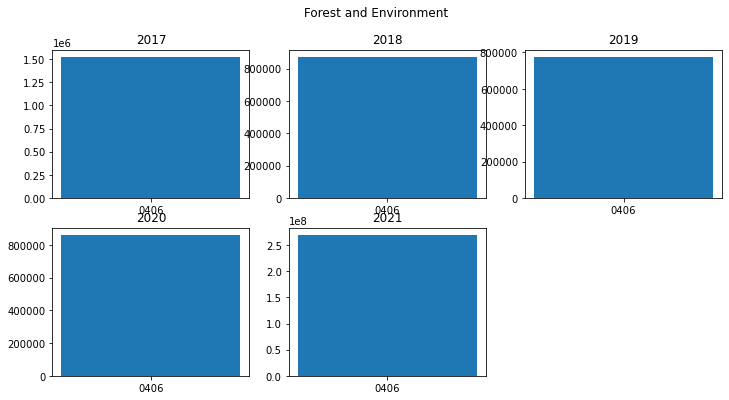

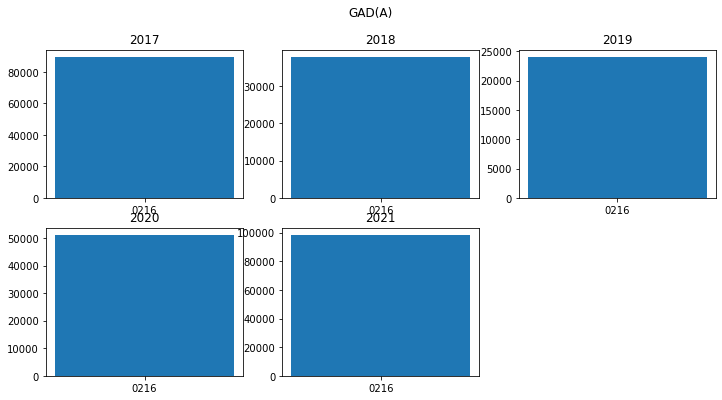

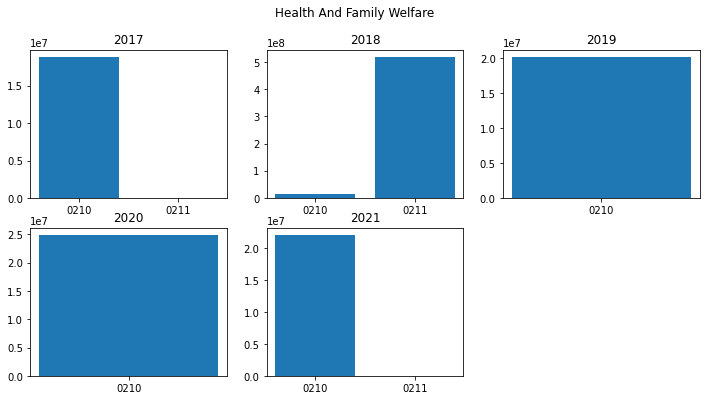

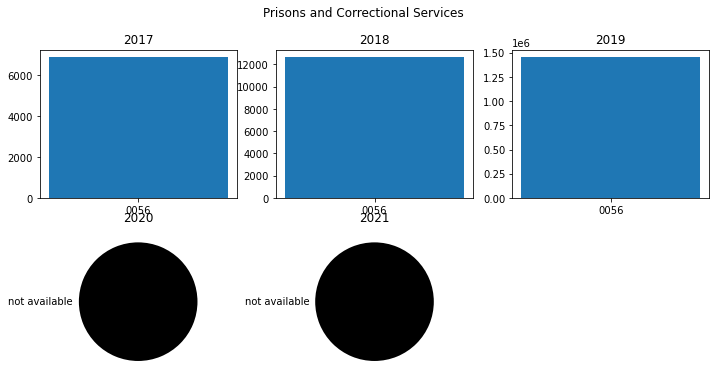

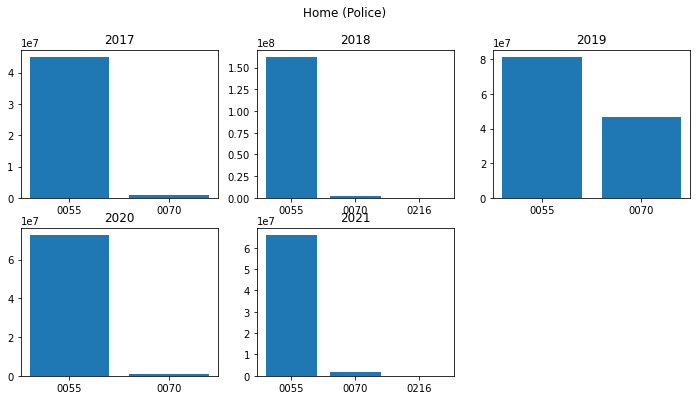

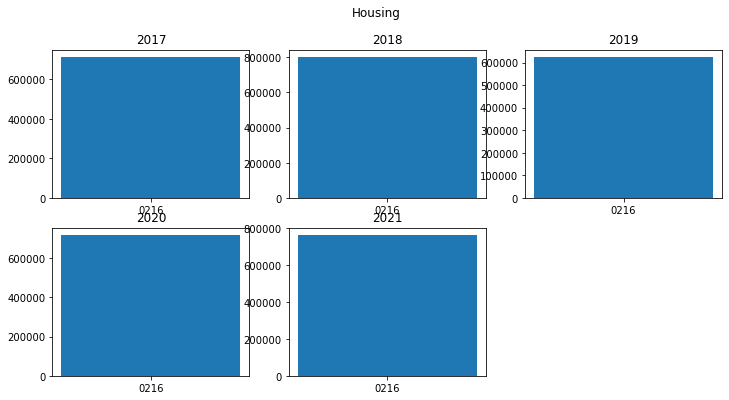

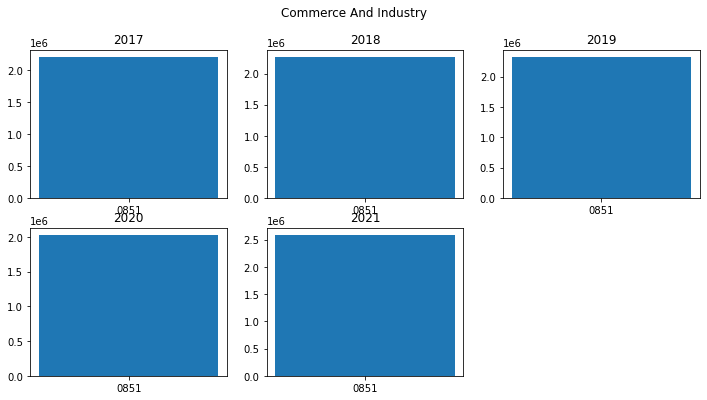

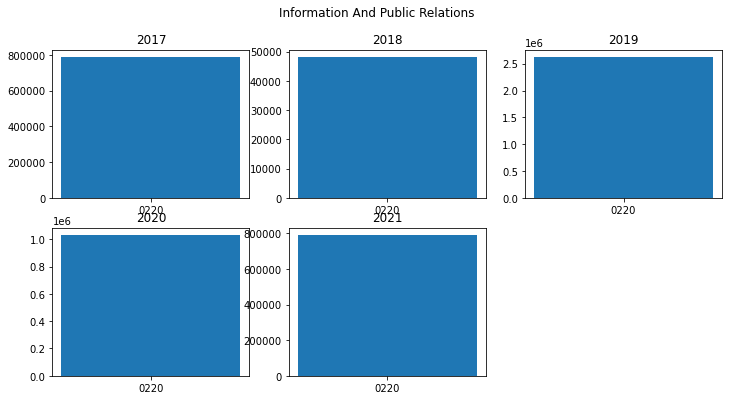

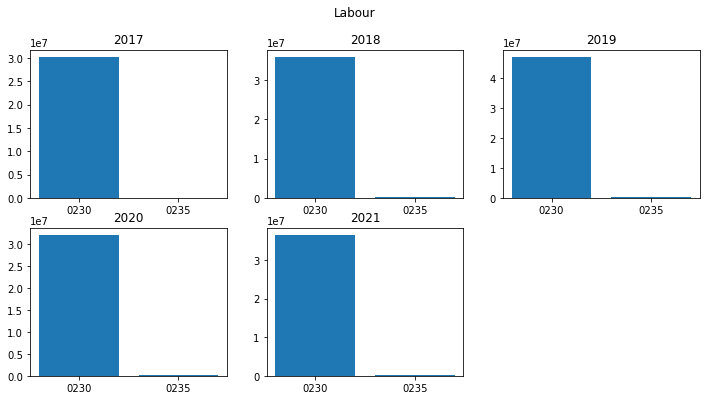

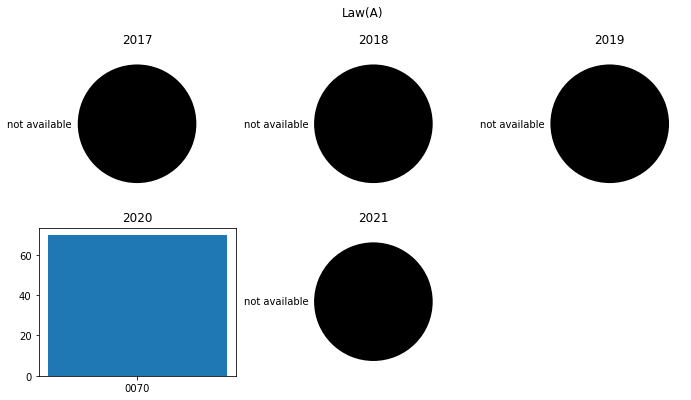

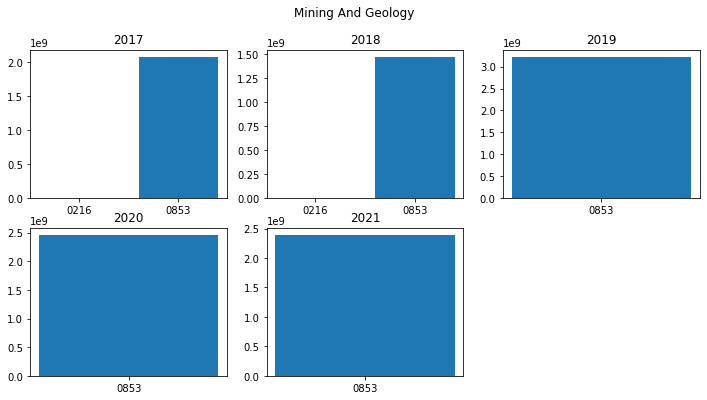

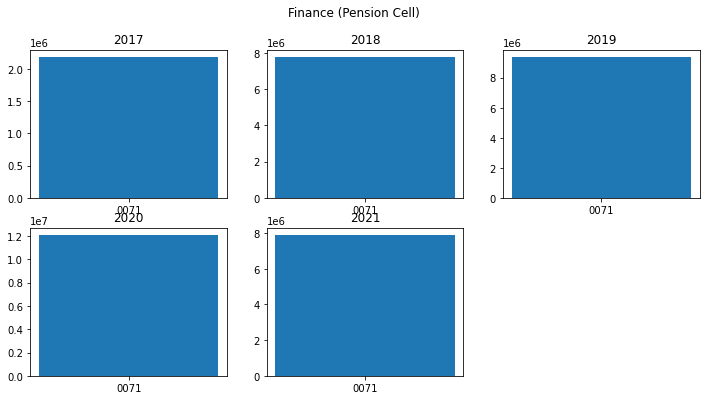

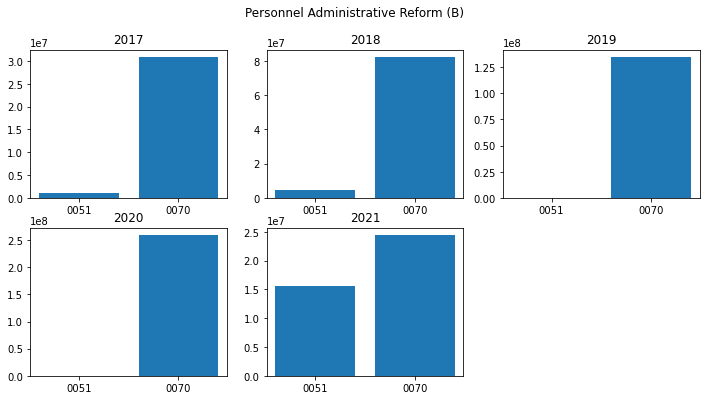

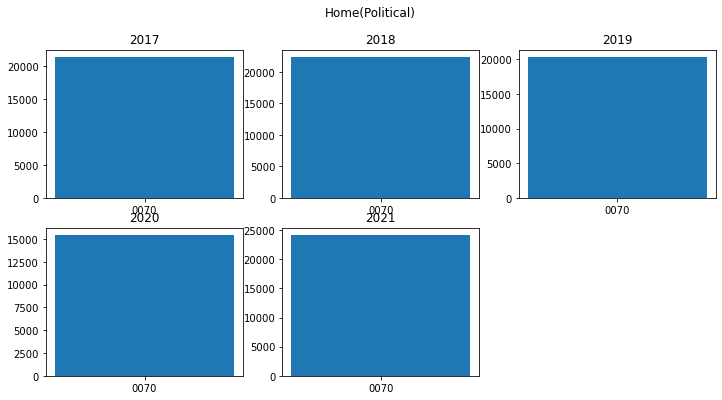

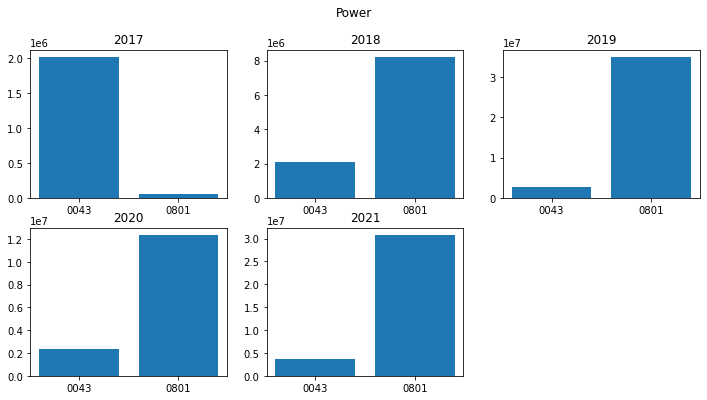

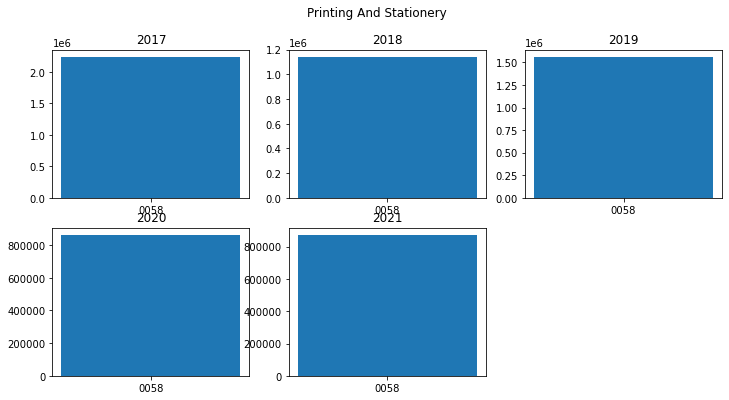

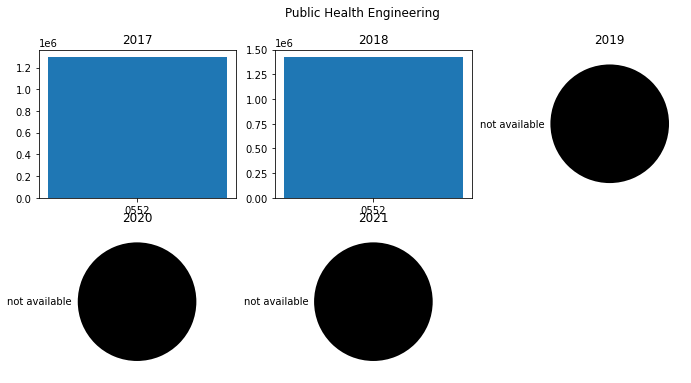

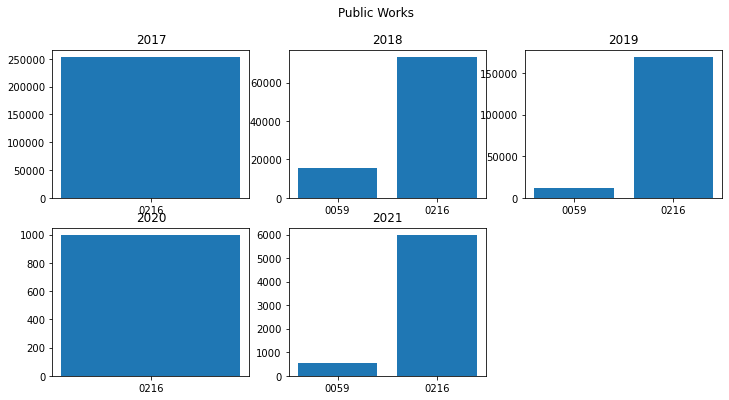

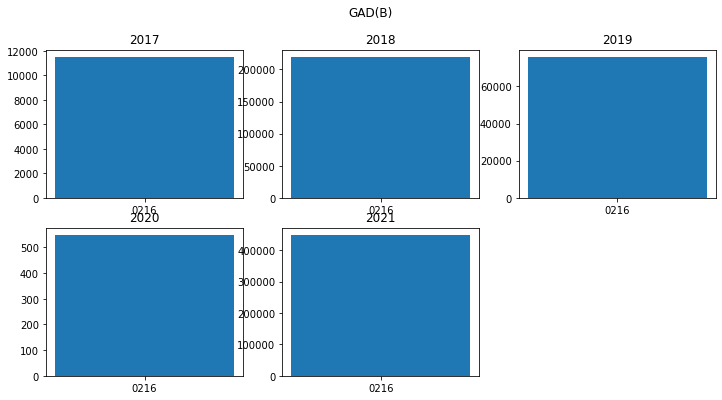

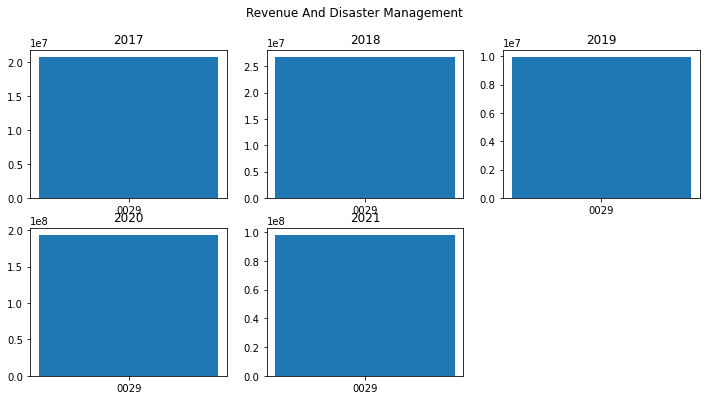

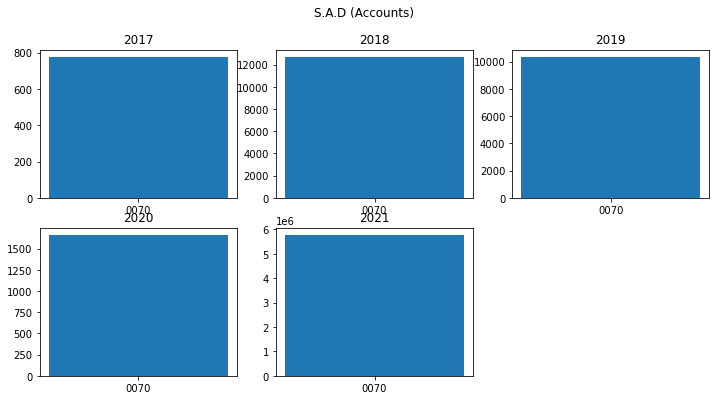

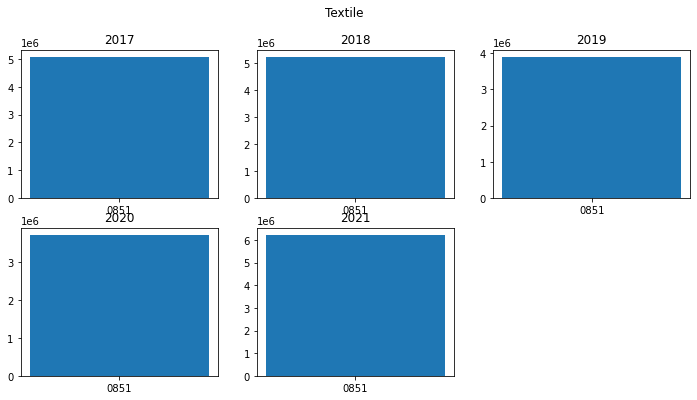

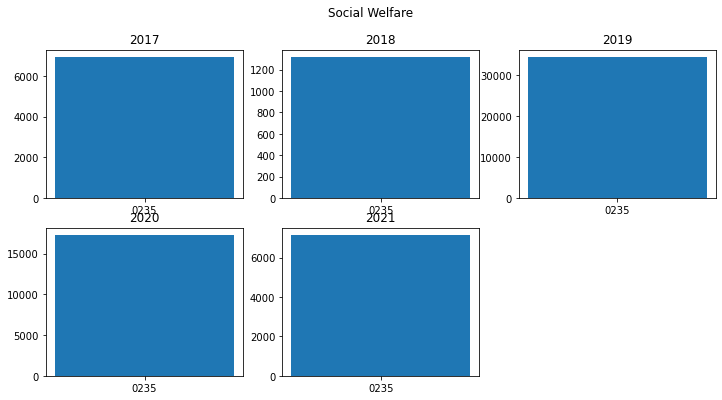

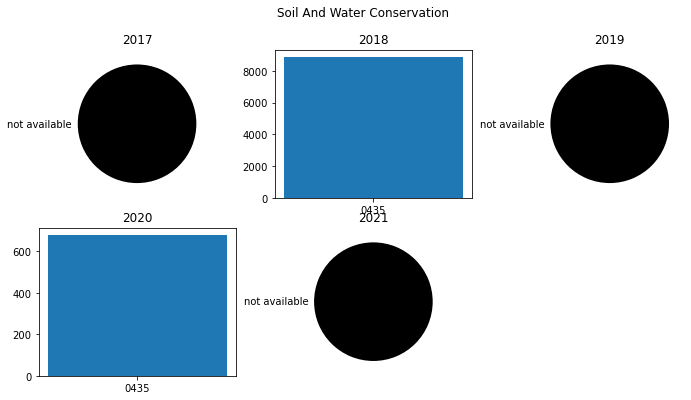

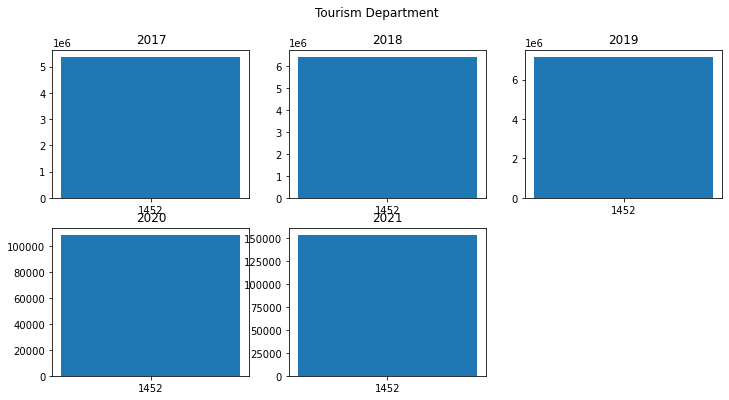

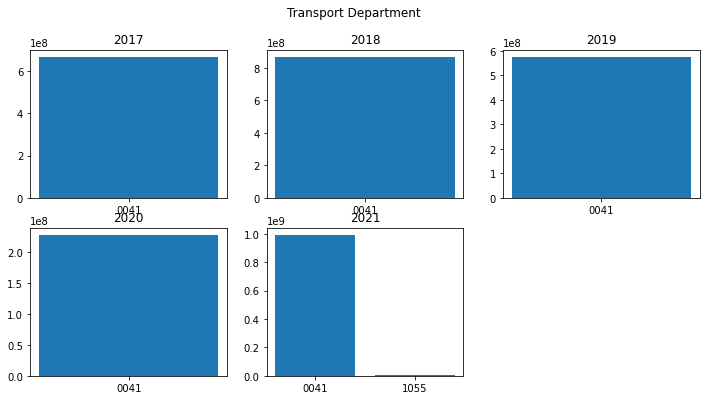

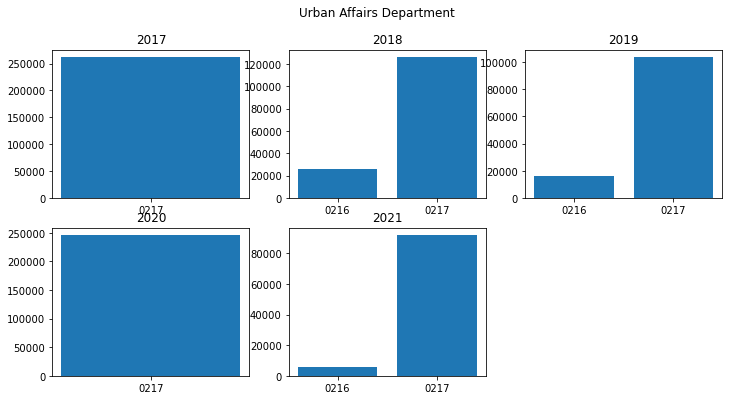

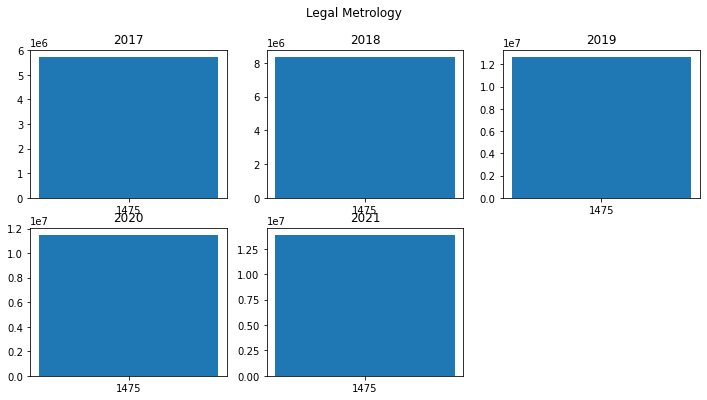

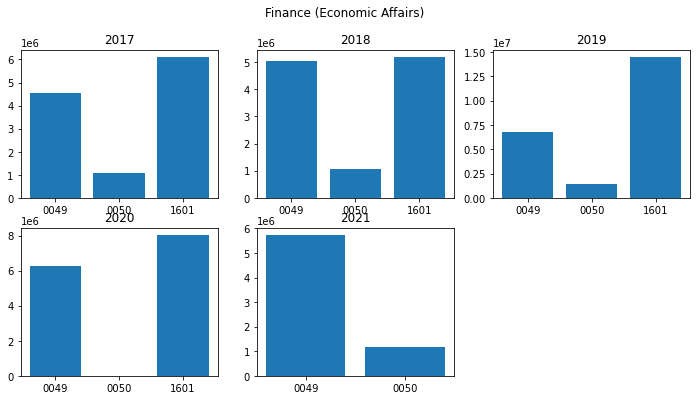

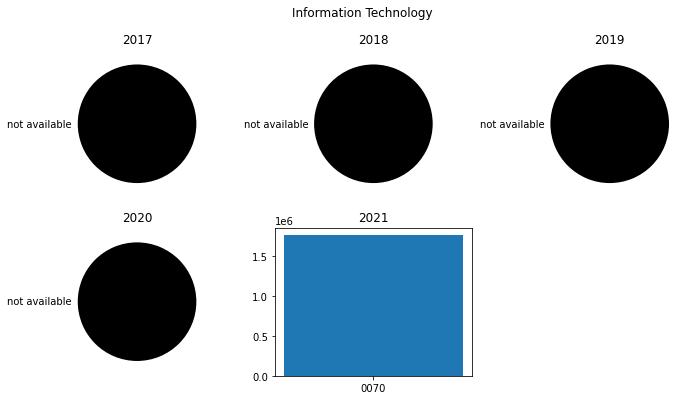

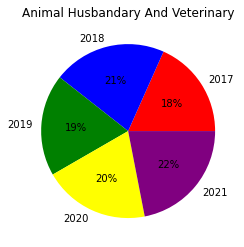

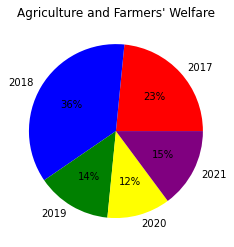

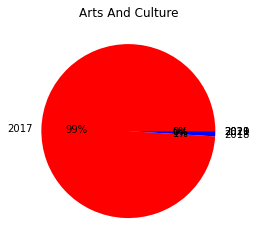

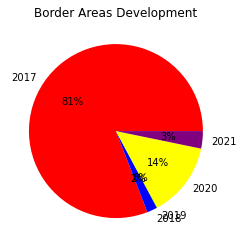

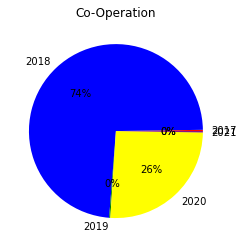

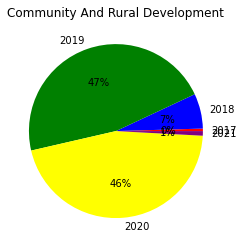

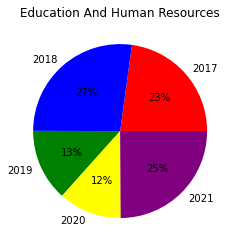

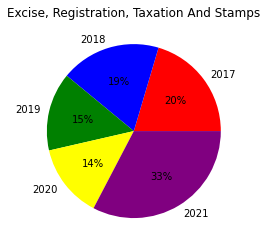

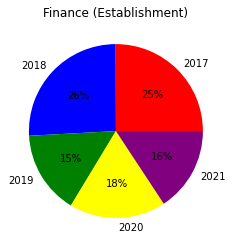

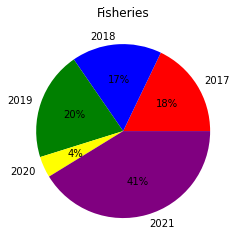

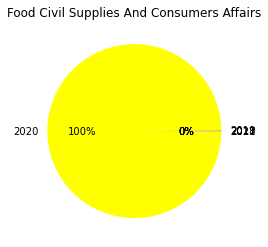

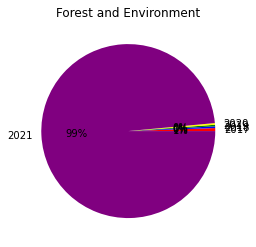

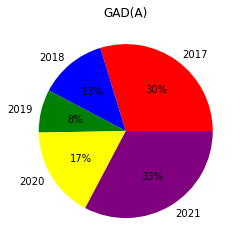

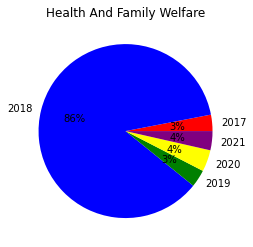

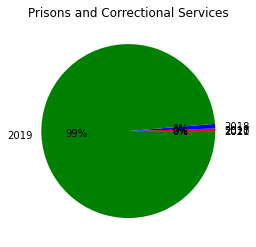

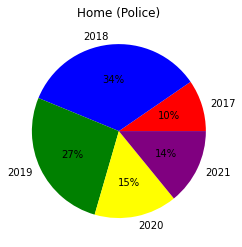

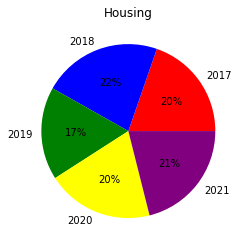

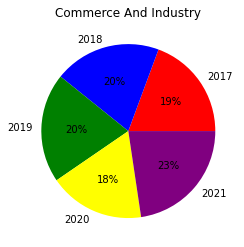

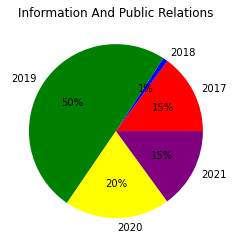

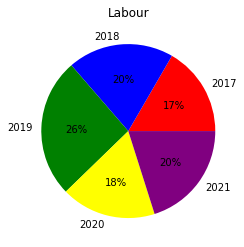

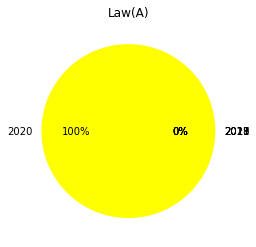

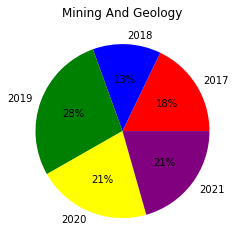

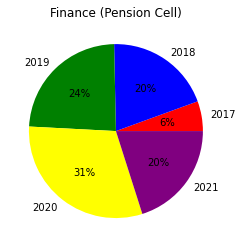

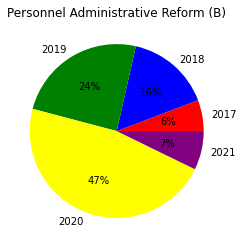

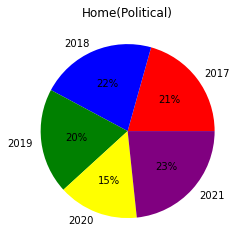

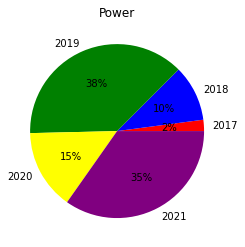

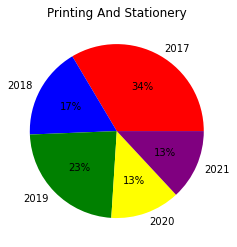

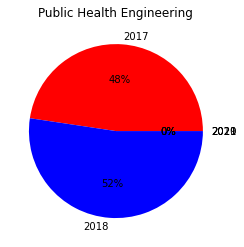

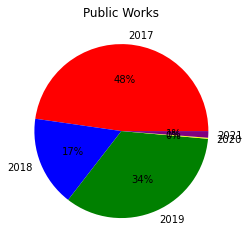

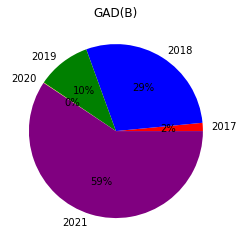

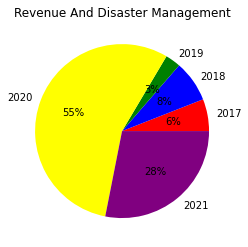

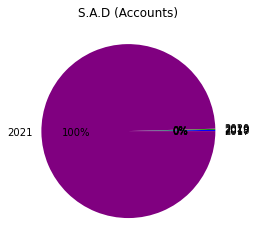

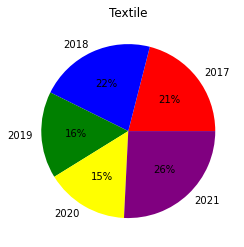

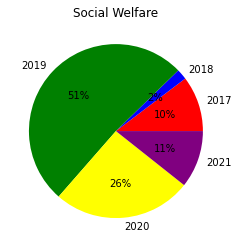

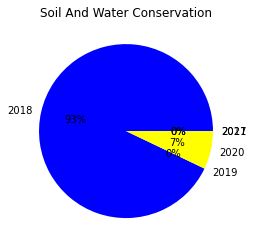

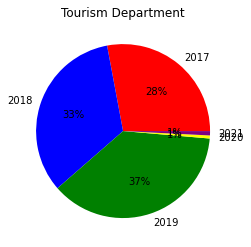

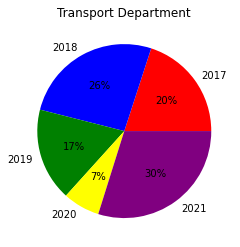

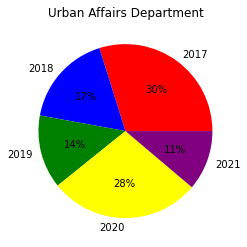

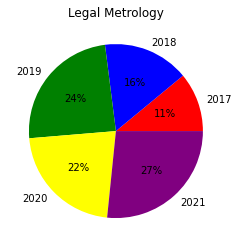

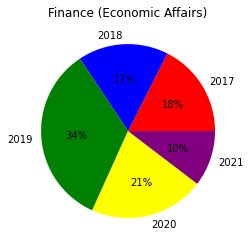

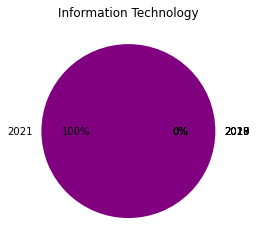

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics as st
data=pd.read_csv('mapping_department.csv')
data.drop(['Unnamed: 0'],axis=1,inplace=True)
data.scheme_code=data.scheme_code.astype(str)
data.scheme_code=data.scheme_code.str.zfill(13)
data.major_head=data.major_head.astype(str)
data.major_head=data.major_head.str.zfill(4)

#for  major heads visualization
year2017=data[(((data['tran_year']==2017) & (data['tran_month']>=4))  | ((data['tran_year']==2018) & (data['tran_month']<=3)))]
year2018=data[(((data['tran_year']==2018) & (data['tran_month']>=4))  | ((data['tran_year']==2019) & (data['tran_month']<=3)))]              
year2019=data[(((data['tran_year']==2019) & (data['tran_month']>=4))  | ((data['tran_year']==2020) & (data['tran_month']<=3)))]
year2020=data[(((data['tran_year']==2020) & (data['tran_month']>=4))  | ((data['tran_year']==2021) & (data['tran_month']<=3)))]
year2021=data[(((data['tran_year']==2021) & (data['tran_month']>=4))  | ((data['tran_year']==2022) & (data['tran_month']<=3)))]

head2017=pd.pivot_table(year2017,index=['major_head'],values=['amount'],aggfunc=np.sum).reset_index(level=0)
head2018=pd.pivot_table(year2018,index=['major_head'],values=['amount'],aggfunc=np.sum).reset_index(level=0)
head2019=pd.pivot_table(year2019,index=['major_head'],values=['amount'],aggfunc=np.sum).reset_index(level=0)
head2020=pd.pivot_table(year2020,index=['major_head'],values=['amount'],aggfunc=np.sum).reset_index(level=0)
head2021=pd.pivot_table(year2021,index=['major_head'],values=['amount'],aggfunc=np.sum).reset_index(level=0)

head=data.major_head.unique()
head=head.astype(int)
head.sort()
head=head.astype(str)
heads=[]
for i in head:
    i=i.zfill(4)
    heads.append(i)

list_amount=[[]for i in heads]
for i in range(len(heads)):
    if heads[i] not in year2017.major_head.unique():
        list_amount[i].append(0)
    elif heads[i] in year2017.major_head.unique():
        list_amount[i].append(float(head2017.amount[head2017['major_head']==heads[i]]))
        
    if heads[i] not in year2018.major_head.unique():
        list_amount[i].append(0)
    elif heads[i] in year2018.major_head.unique():
        list_amount[i].append(float(head2018.amount[head2018['major_head']==heads[i]]))
        
    if heads[i] not in year2019.major_head.unique():
        list_amount[i].append(0)
    elif heads[i] in year2019.major_head.unique():
        list_amount[i].append(float(head2019.amount[head2019['major_head']==heads[i]]))
        
    if heads[i] not in year2020.major_head.unique():
        list_amount[i].append(0)
    elif heads[i] in year2020.major_head.unique():
        list_amount[i].append(float(head2020.amount[head2020['major_head']==heads[i]]))
        
    if heads[i] not in year2021.major_head.unique():
        list_amount[i].append(0)
    elif heads[i] in year2021.major_head.unique():
        list_amount[i].append(float(head2021.amount[head2021['major_head']==heads[i]]))
        
years=[2017,2018,2019,2020,2021]

def piechart_view_of_majorheads():
    for i in range(len(list_amount)):
        #print('major head'+heads[i])
        plt.pie(list_amount[i],labels=years,colors=['red','blue','yellow','green','pink'])
        plt.title('major head'+heads[i])
        plt.show()
def bargraph_view_of_majorheads():
    for i in range(len(list_amount)):
        #print('major head'+heads[i])
        plt.bar(years,list_amount[i])
        plt.xlabel('Years')
        plt.ylabel('Total Amount')
        plt.title('major head'+heads[i])
        plt.show()
predicted_amount=[]

def algorithims(a,b,c,d,e):    
       
        if ((b>0) & (c>0) & (d>0)&(e>0)):
            difference=(((c-b)*100/b)+((d-c)*100/c)+((e-d)*100/d))/3
            prediction=e+((e*(difference))/100)
            predicted_amount.append(prediction)
            #print('predicted amount for major head'+heads[i]+' is ',prediction)
        else:
            difference=((b-a)+(c-b)+(d-c)+(e-d))/4
            prediction=e+difference
            if prediction>0:
                predicted_amount.append(prediction)
            else:    
                prediction=(a+b+c+d+e)/5
            #print('predicted amount for major head'+heads[i]+' is ',prediction)
                predicted_amount.append(prediction)

#for department_wise major head visualization
departments=data.dept_code.unique()
departments.sort()

amount17=pd.pivot_table(year2017,index=['dept_code','major_head'],values=['amount'],aggfunc=np.sum).reset_index(level=0).reset_index(level=0)
amount18=pd.pivot_table(year2018,index=['dept_code','major_head'],values=['amount'],aggfunc=np.sum).reset_index(level=0).reset_index(level=0)
amount19=pd.pivot_table(year2019,index=['dept_code','major_head'],values=['amount'],aggfunc=np.sum).reset_index(level=0).reset_index(level=0)
amount20=pd.pivot_table(year2020,index=['dept_code','major_head'],values=['amount'],aggfunc=np.sum).reset_index(level=0).reset_index(level=0)
amount21=pd.pivot_table(year2021,index=['dept_code','major_head'],values=['amount'],aggfunc=np.sum).reset_index(level=0).reset_index(level=0)

mh_of_17=amount17.dept_code.unique()
mh_of_18=amount18.dept_code.unique()
mh_of_19=amount19.dept_code.unique()
mh_of_20=amount20.dept_code.unique()
mh_of_21=amount21.dept_code.unique()

MajorHeads=(data.major_head.unique())
MajorHeads=MajorHeads.tolist()
color=['red','blue','skyblue','green','orange','brown','yellow','purple','grey','lightgreen','lightpink','whitesmoke','crimson','chocolate','chartreuse','chocolate','sandybrown','cornflowerblue','darksalmon','gainsboro','darkorange','coral','cadetblue','darkolivegreen','orange','hotpink','indigo','turquoise','mediumorchid','skyblue','wheat','teal','springgreen','slategray','skyblue','tan','darkslategray','powderblue','rosybrown','blueviolet','blanchedalmond','blueviolet','slateblue','yellow','plum','firebrick','khaki']

mc={'color': color,
    'MajorHead':MajorHeads}
color_codes=pd.DataFrame(mc)

x=[100]
labels=['not available']

def piechart_view_of_departmentwisw_majorheads():
    for i in departments:
        #print(str(dept.dept_name[dept.dept_code==i]).split('\n')[0])
        plt.figure(figsize=(12, 6))
        plt.suptitle(data.dept_name[data.dept_code==i].unique()[0])
        plt.subplot(2,3,1)
        if i in mh_of_17:
            plt.pie(amount17.amount[amount17['dept_code']==i],labels=amount17.major_head[amount17['dept_code']==i],colors=[color[MajorHeads.index(j)] for j in amount17.major_head[amount17.dept_code==i]] ,autopct='%.0f%%')
            plt.title('2017')
        else:
            plt.pie(x,labels=labels,colors=['black'])
            plt.title('2017')
        plt.subplot(2,3,2)
        if i in mh_of_18:
            plt.pie(amount18.amount[amount18['dept_code']==i],labels=amount18.major_head[amount18['dept_code']==i],colors=[color[MajorHeads.index(j)] for j in amount18.major_head[amount18.dept_code==i]] ,autopct='%.0f%%')
            plt.title('2018')
        else: 
            plt.pie(x,labels=labels,colors=['black'])
            plt.title('2018')
        plt.subplot(2,3,3)
        if i in mh_of_19:
            plt.pie(amount19.amount[amount19['dept_code']==i],labels=amount19.major_head[amount19['dept_code']==i],colors=[color[MajorHeads.index(j)] for j in amount19.major_head[amount19.dept_code==i]] ,autopct='%.0f%%')
            plt.title('2019')
        else:
            plt.pie(x,labels=labels,colors=['black'])
            plt.title('2019')
        plt.subplot(2,3,4)
        if i in mh_of_20:
            plt.pie(amount20.amount[amount20['dept_code']==i],labels=amount20.major_head[amount20['dept_code']==i],colors=[color[MajorHeads.index(j)] for j in amount20.major_head[amount20.dept_code==i]] ,autopct='%.0f%%')
            plt.title('2020')
        else:
            plt.pie(x,labels=labels,colors=['black'])
            plt.title('2020')
        
        plt.subplot(2,3,5)
        if i in mh_of_21:
            plt.pie(amount21.amount[amount21['dept_code']==i],labels=amount21.major_head[amount21['dept_code']==i],colors=[color[MajorHeads.index(j)] for j in amount21.major_head[amount21.dept_code==i]] ,autopct='%.0f%%')
            plt.title('2021')
        else:
            plt.pie(x,labels=labels,colors=['black'])
            plt.title('2021')
        plt.show()

def bargraph_view_of_departmentwise_majorheads():
    for i in departments:
        #print(str(dept.dept_name[dept.dept_code==i]).split('\n')[0])
        plt.figure(figsize=(12, 6))
        plt.suptitle(data.dept_name[data.dept_code==i].unique()[0])
        plt.subplot(2,3,1)
        if i in mh_of_17:
            plt.bar(amount17.major_head[amount17['dept_code']==i],amount17.amount[amount17['dept_code']==i])
            plt.title('2017')
        else:
            plt.pie(x,labels=labels,colors=['black'])
            plt.title('2017')
        plt.subplot(2,3,2)
        if i in mh_of_18:
            plt.bar(amount18.major_head[amount18['dept_code']==i],amount18.amount[amount18['dept_code']==i],)
            plt.title('2018')
        else: 
            plt.pie(x,labels=labels,colors=['black'])
            plt.title('2018')
        plt.subplot(2,3,3)
        if i in mh_of_19:
            plt.bar(amount19.major_head[amount19['dept_code']==i],amount19.amount[amount19['dept_code']==i])
            plt.title('2019')
        else:
            plt.pie(x,labels=labels,colors=['black'])
            plt.title('2019')
        plt.subplot(2,3,4)
        if i in mh_of_20:
            plt.bar(amount20.major_head[amount20['dept_code']==i],amount20.amount[amount20['dept_code']==i])
            plt.title('2020')
        else:
            plt.pie(x,labels=labels,colors=['black'])
            plt.title('2020')
        
        plt.subplot(2,3,5)
        if i in mh_of_21:
            plt.bar(amount21.major_head[amount21['dept_code']==i],amount21.amount[amount21['dept_code']==i])
            plt.title('2021')
        else:
            plt.pie(x,labels=labels,colors=['black'])
            plt.title('2021')
        plt.show()

#department wise 
dept_amount_2017=pd.pivot_table(amount17,index=['dept_code'],values=['amount'],aggfunc=np.sum).reset_index(level=0)
dept_amount_2018=pd.pivot_table(amount18,index=['dept_code'],values=['amount'],aggfunc=np.sum).reset_index(level=0)
dept_amount_2019=pd.pivot_table(amount19,index=['dept_code'],values=['amount'],aggfunc=np.sum).reset_index(level=0)
dept_amount_2020=pd.pivot_table(amount20,index=['dept_code'],values=['amount'],aggfunc=np.sum).reset_index(level=0)
dept_amount_2021=pd.pivot_table(amount21,index=['dept_code'],values=['amount'],aggfunc=np.sum).reset_index(level=0)

dept_codes_amount=[[]for i in departments]

for i in range(len(dept_codes_amount)):
    if departments[i] not in year2017.dept_code.unique():
        dept_codes_amount[i].append(0)
    else:
        dept_codes_amount[i].append(float(dept_amount_2017.amount[dept_amount_2017['dept_code']==departments[i]]))
        
    if departments[i] not in year2018.dept_code.unique():
        dept_codes_amount[i].append(0)
    else:
        dept_codes_amount[i].append(float(dept_amount_2018.amount[dept_amount_2018['dept_code']==departments[i]]))
        
    if departments[i] not in year2019.dept_code.unique():
        dept_codes_amount[i].append(0)
    else:
        dept_codes_amount[i].append(float(dept_amount_2019.amount[dept_amount_2019['dept_code']==departments[i]]))
        
    if departments[i] not in year2020.dept_code.unique():
        dept_codes_amount[i].append(0)
    else:
        dept_codes_amount[i].append(float(dept_amount_2020.amount[dept_amount_2020['dept_code']==departments[i]]))
        
    if departments[i] not in year2021.dept_code.unique():
        dept_codes_amount[i].append(0)
    else:
        dept_codes_amount[i].append(float(dept_amount_2021.amount[dept_amount_2021['dept_code']==departments[i]]))
        
def piechart_view_of_departments():    
    for i in range(len(dept_codes_amount)):
        plt.pie(dept_codes_amount[i],labels=years,colors=['red','blue','green','yellow','purple'],autopct='%.0f%%')
        plt.title(data.dept_name[data.dept_code==departments[i]].unique()[0])
        plt.show()        
    
predicted_amount_dept=[]

def dept_algorithims(a,b,c,d,e):    
       
        if (((b>0) & (c>0) & (d>0)&(e>0))& (((a+b+c+d+e)/5)>st.median([a,b,c,d,e]))):
            difference=(((c-b)*100/b)+((d-c)*100/c)+((e-d)*100/d))/3
            prediction=e+((e*(difference))/100)
            predicted_amount_dept.append(prediction)
            print('predicted amount for dept '+data.dept_name[data.dept_code==departments[i]].unique()[0]+' is ',prediction)
        else:
            difference=((b-a)+(c-b)+(d-c)+(e-d))/4
            prediction=e+difference
            if prediction>0:
                print('predicted amount for dept '+data.dept_name[data.dept_code==departments[i]].unique()[0]+' is ',prediction)
                predicted_amount_dept.append(prediction)
            else:    
                prediction=(a+b+c+d+e)/5
                print('predicted amount for dept '+data.dept_name[data.dept_code==departments[i]].unique()[0]+' is ',prediction)
                predicted_amount_dept.append(prediction)
                
for i in range(len(dept_codes_amount)):
    a2=float(dept_codes_amount[i][0])
    b2=float(dept_codes_amount[i][1])
    c2=float(dept_codes_amount[i][2])
    d2=float(dept_codes_amount[i][3])
    e2=float(dept_codes_amount[i][4])
    dept_algorithims(a2,b2,c2,d2,e2)

piechart_view_of_majorheads()
bargraph_view_of_majorheads()
piechart_view_of_departmentwisw_majorheads()
bargraph_view_of_departmentwise_majorheads()
piechart_view_of_departments()


for i in range(len(list_amount)):
    a1=float(list_amount[i][0])
    b1=float(list_amount[i][1])
    c1=float(list_amount[i][2])
    d1=float(list_amount[i][3])
    e1=float(list_amount[i][4])
    algorithims(a1,b1,c1,d1,e1)

estimation_for_major_heads=pd.DataFrame({'major_heads':heads,'predicted_amount': predicted_amount})
estimation_for_departments=pd.DataFrame({'dept_code':departments,'predicted_amount':predicted_amount_dept})
    


In [4]:
estimation_for_major_heads

,major_heads,predicted_amount
0,0006,4.588530e+09
1,0028,8.519555e+06
2,0029,6.658237e+08
3,0030,2.864122e+08
4,0039,3.464845e+09
5,0040,9.962895e+09
6,0041,1.791400e+09
7,0042,2.271291e+08
8,0043,1.575312e+07
9,0045,7.306745e+06


In [5]:
estimation_for_departments

,dept_code,predicted_amount
0,1,2.257995e+07
1,2,2.348607e+07
2,3,4.300800e+05
3,4,1.474857e+06
4,5,1.792673e+07
5,6,4.708237e+05
6,7,1.942894e+07
7,9,2.093360e+10
8,10,6.218120e+06
9,11,1.662057e+06


In [4]:
17/2%2*3**3

13.5

In [13]:
17/2%2

0.5

In [14]:
import numpy as np

In [16]:
array=np.array([1,2,3,4])

In [20]:
def Return():
    n=14
    if(n<20):
        print('ok')
    return 2
        